# Project: Israel - Palastine War Mapping

In [1]:
#Import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
database=pd.read_csv(r"C:\Users\wanja\OneDrive\Desktop\Israel-Hamas War\Palestine Body Count.csv")

In [4]:
database

Year      Month Palestinians Injuries Israelis Injuries   
0    2000.0   DECEMBER                   781               NaN  \
1    2000.0   NOVEMBER                  3838               NaN   
2    2000.0    OCTOBER                  5984               NaN   
3    2000.0  SEPTEMBER                   NaN               NaN   
4    2001.0   DECEMBER                   304               NaN   
..      ...        ...                   ...               ...   
246  2021.0      MARCH                   NaN               NaN   
247  2021.0      APRIL                   NaN               NaN   
248  2021.0        MAY                   NaN               NaN   
249     NaN        NaN                   NaN               NaN   
250     NaN        NaN               111,475             5,160   

    Palestinians Killed Israelis Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3                    16               1  
4                    67              36  
..                  ...             ...  
246                   4               0  
247                   1               0  
248                  26               3  
249                 NaN             NaN  
250              10,000           1,275  

[251 rows x 6 columns]

In [5]:
database.head()

Year      Month Palestinians Injuries Israelis Injuries   
0  2000.0   DECEMBER                   781               NaN  \
1  2000.0   NOVEMBER                  3838               NaN   
2  2000.0    OCTOBER                  5984               NaN   
3  2000.0  SEPTEMBER                   NaN               NaN   
4  2001.0   DECEMBER                   304               NaN   

  Palestinians Killed Israelis Killed  
0                  51               8  
1                 112              22  
2                 104              10  
3                  16               1  
4                  67              36

In [6]:
database.tail()

Year  Month Palestinians Injuries Israelis Injuries   
246  2021.0  MARCH                   NaN               NaN  \
247  2021.0  APRIL                   NaN               NaN   
248  2021.0    MAY                   NaN               NaN   
249     NaN    NaN                   NaN               NaN   
250     NaN    NaN               111,475             5,160   

    Palestinians Killed Israelis Killed  
246                   4               0  
247                   1               0  
248                  26               3  
249                 NaN             NaN  
250              10,000           1,275

In [7]:
database.shape

(251, 6)

In [8]:
database.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed'],
      dtype='object')

In [9]:
database.isnull().sum()

Year                       2
Month                      2
Palestinians Injuries     55
Israelis Injuries        118
Palestinians Killed        1
Israelis Killed            1
dtype: int64

In [10]:
database.duplicated().sum()

0

In [11]:
database.info

<bound method DataFrame.info of        Year      Month Palestinians Injuries Israelis Injuries   
0    2000.0   DECEMBER                   781               NaN  \
1    2000.0   NOVEMBER                  3838               NaN   
2    2000.0    OCTOBER                  5984               NaN   
3    2000.0  SEPTEMBER                   NaN               NaN   
4    2001.0   DECEMBER                   304               NaN   
..      ...        ...                   ...               ...   
246  2021.0      MARCH                   NaN               NaN   
247  2021.0      APRIL                   NaN               NaN   
248  2021.0        MAY                   NaN               NaN   
249     NaN        NaN                   NaN               NaN   
250     NaN        NaN               111,475             5,160   

    Palestinians Killed Israelis Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3      

In [12]:
database=database.fillna({
    'Palastinians Injuries':'0',
    'Israelis Injuries':'0'
})

In [13]:
database

Year      Month Palestinians Injuries Israelis Injuries   
0    2000.0   DECEMBER                   781                 0  \
1    2000.0   NOVEMBER                  3838                 0   
2    2000.0    OCTOBER                  5984                 0   
3    2000.0  SEPTEMBER                   NaN                 0   
4    2001.0   DECEMBER                   304                 0   
..      ...        ...                   ...               ...   
246  2021.0      MARCH                   NaN                 0   
247  2021.0      APRIL                   NaN                 0   
248  2021.0        MAY                   NaN                 0   
249     NaN        NaN                   NaN                 0   
250     NaN        NaN               111,475             5,160   

    Palestinians Killed Israelis Killed  
0                    51               8  
1                   112              22  
2                   104              10  
3                    16               1  
4                    67              36  
..                  ...             ...  
246                   4               0  
247                   1               0  
248                  26               3  
249                 NaN             NaN  
250              10,000           1,275  

[251 rows x 6 columns]

In [14]:
numerical_columns = ['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed','Israelis Killed']
database[numerical_columns] = database[numerical_columns].replace({',': ''}, regex=True)
database[numerical_columns] = database[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [15]:
database

Year      Month  Palestinians Injuries  Israelis Injuries   
0    2000.0   DECEMBER                  781.0                0.0  \
1    2000.0   NOVEMBER                 3838.0                0.0   
2    2000.0    OCTOBER                 5984.0                0.0   
3    2000.0  SEPTEMBER                    NaN                0.0   
4    2001.0   DECEMBER                  304.0                0.0   
..      ...        ...                    ...                ...   
246  2021.0      MARCH                    NaN                0.0   
247  2021.0      APRIL                    NaN                0.0   
248  2021.0        MAY                    NaN                0.0   
249     NaN        NaN                    NaN                0.0   
250     NaN        NaN               111475.0             5160.0   

     Palestinians Killed  Israelis Killed  
0                   51.0              8.0  
1                  112.0             22.0  
2                  104.0             10.0  
3                   16.0              1.0  
4                   67.0             36.0  
..                   ...              ...  
246                  4.0              0.0  
247                  1.0              0.0  
248                 26.0              3.0  
249                  NaN              NaN  
250              10000.0           1275.0  

[251 rows x 6 columns]

In [16]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  194 non-null    float64
 3   Israelis Injuries      249 non-null    float64
 4   Palestinians Killed    250 non-null    float64
 5   Israelis Killed        250 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.9+ KB


In [17]:
database.describe

<bound method NDFrame.describe of        Year      Month  Palestinians Injuries  Israelis Injuries   
0    2000.0   DECEMBER                  781.0                0.0  \
1    2000.0   NOVEMBER                 3838.0                0.0   
2    2000.0    OCTOBER                 5984.0                0.0   
3    2000.0  SEPTEMBER                    NaN                0.0   
4    2001.0   DECEMBER                  304.0                0.0   
..      ...        ...                    ...                ...   
246  2021.0      MARCH                    NaN                0.0   
247  2021.0      APRIL                    NaN                0.0   
248  2021.0        MAY                    NaN                0.0   
249     NaN        NaN                    NaN                0.0   
250     NaN        NaN               111475.0             5160.0   

     Palestinians Killed  Israelis Killed  
0                   51.0              8.0  
1                  112.0             22.0  
2                

In [18]:
database.nunique()

Year                      22
Month                     14
Palestinians Injuries    169
Israelis Injuries         54
Palestinians Killed       78
Israelis Killed           34
dtype: int64

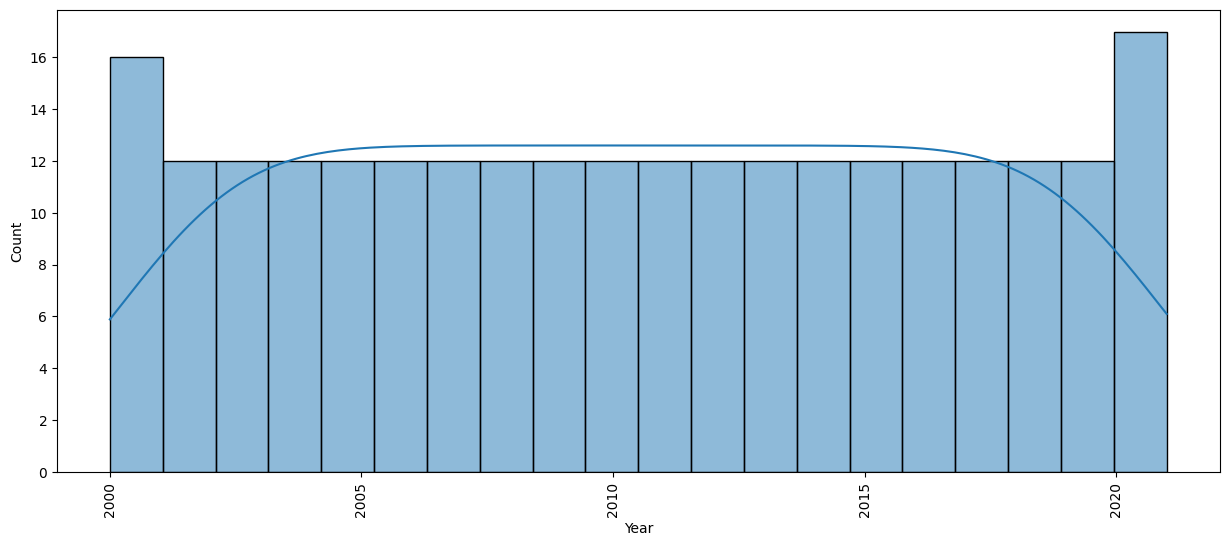

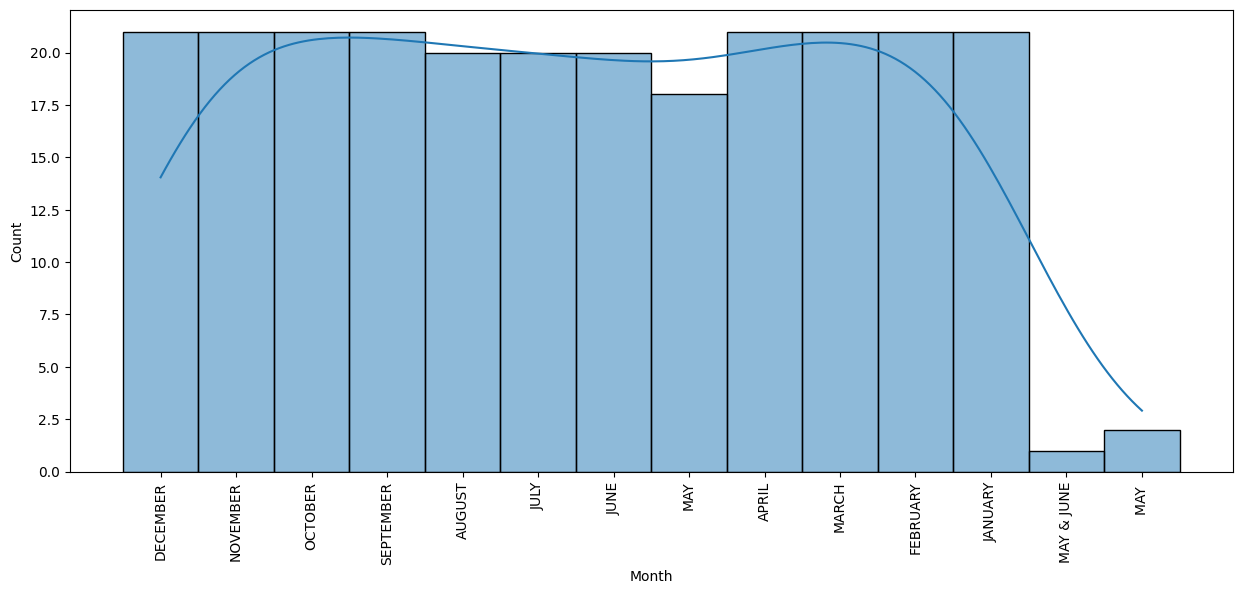

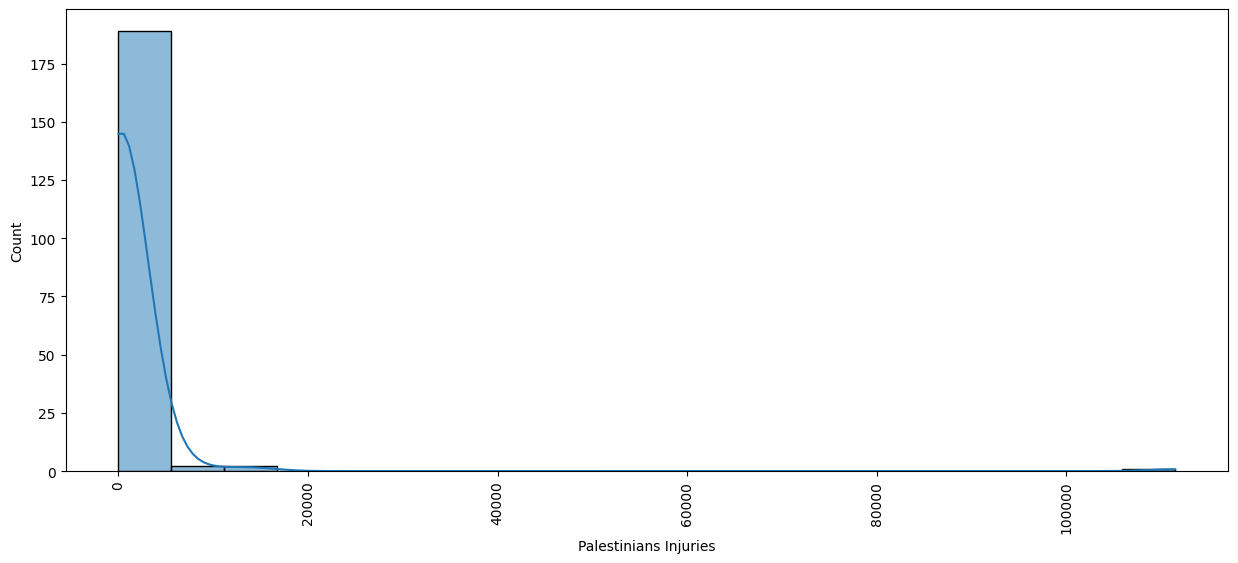

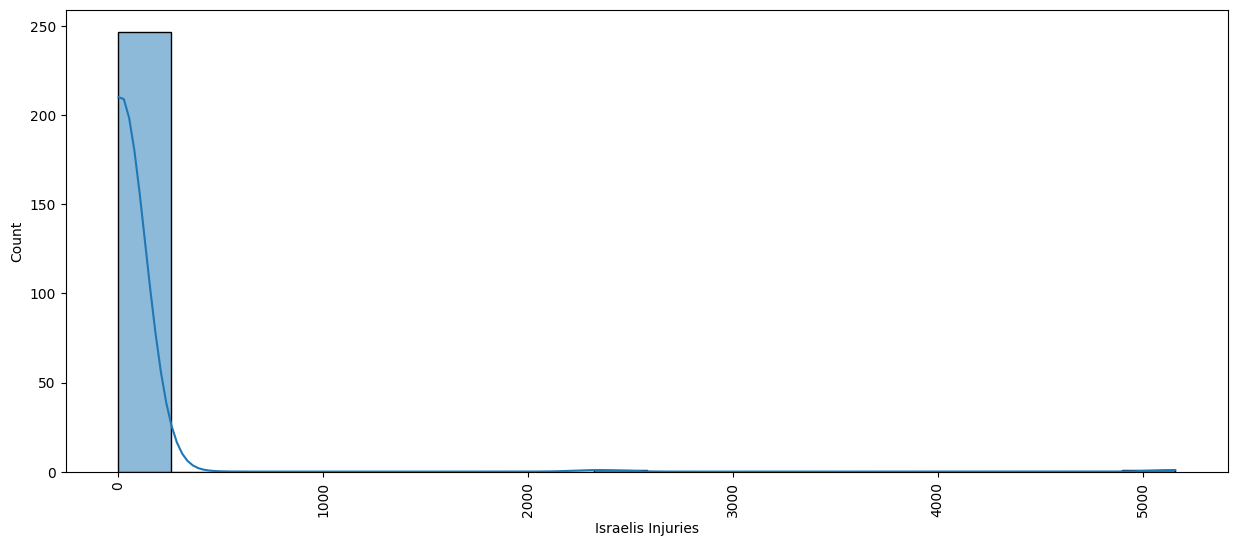

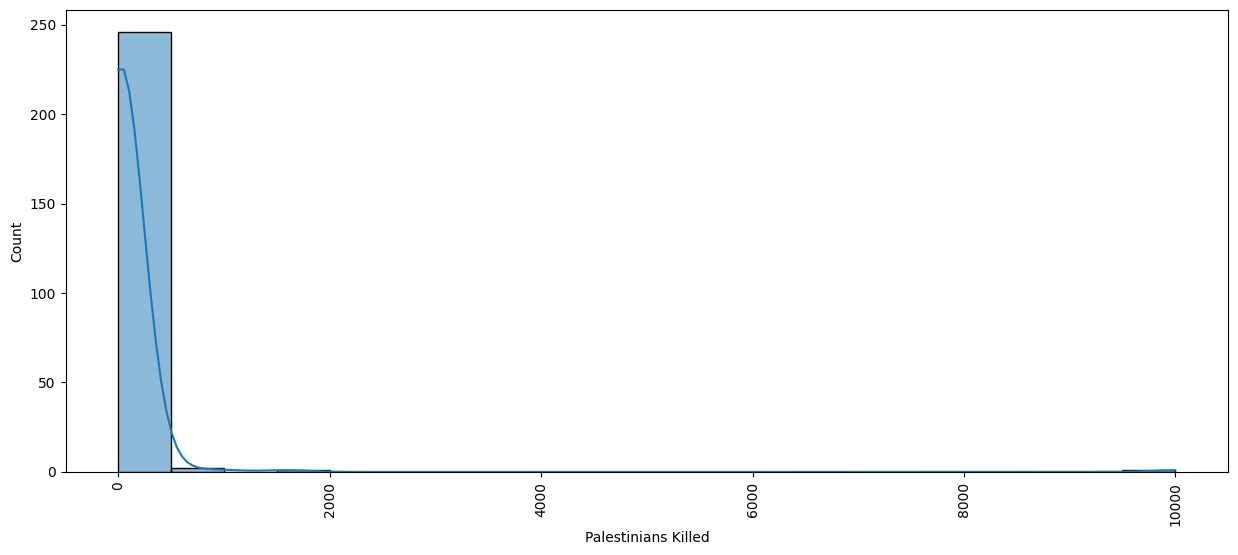

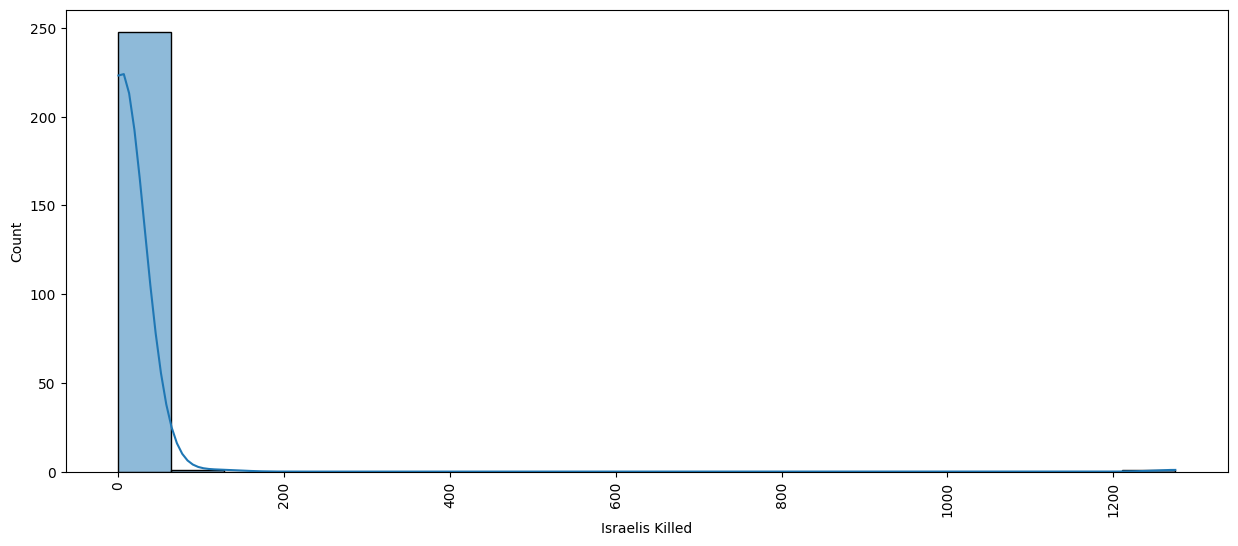

In [19]:
for i in database.columns:
    plt.figure(figsize=(15, 6))
    sns.histplot(database[i], kde = True, bins= 20, palette = 'his')
    plt.xticks(rotation = 90)
    plt.show()

In [20]:
database1 = database[['Year', 'Palestinians Injuries', 'Israelis Injuries','Palestinians Killed',
'Israelis Killed']]

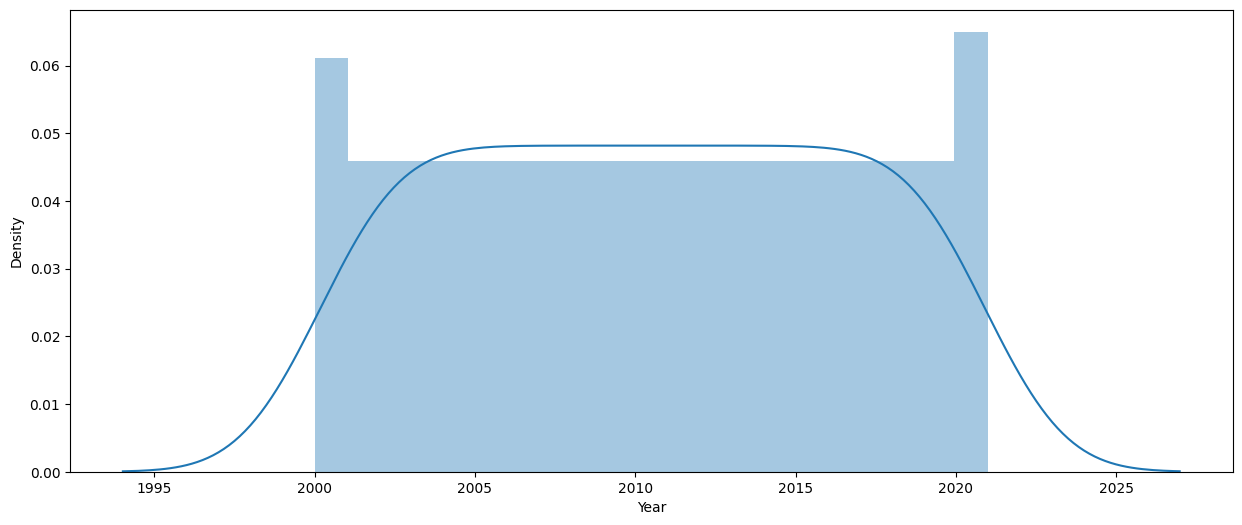

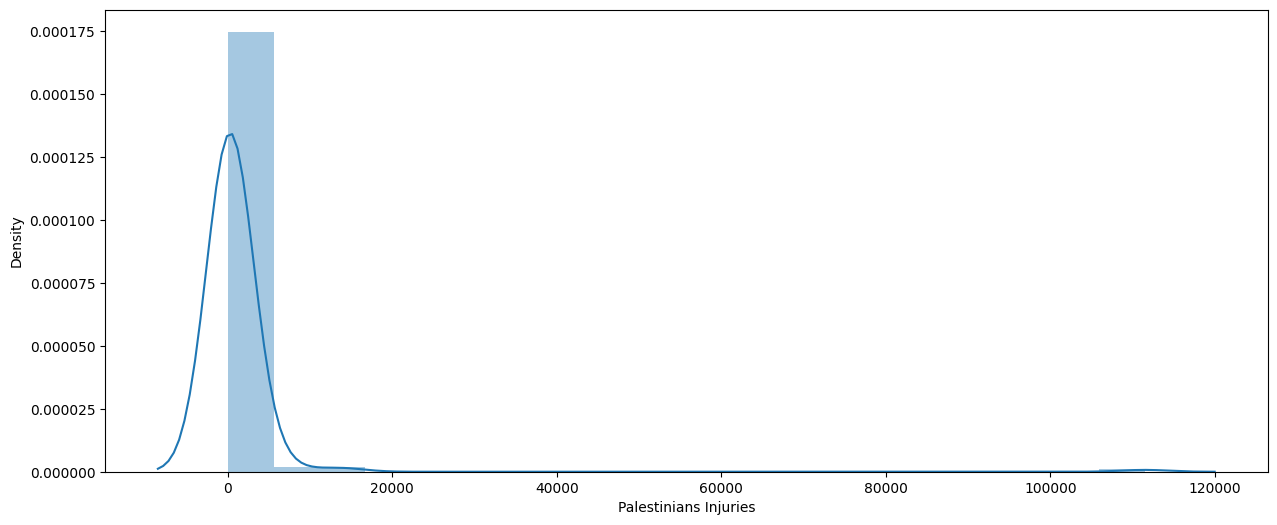

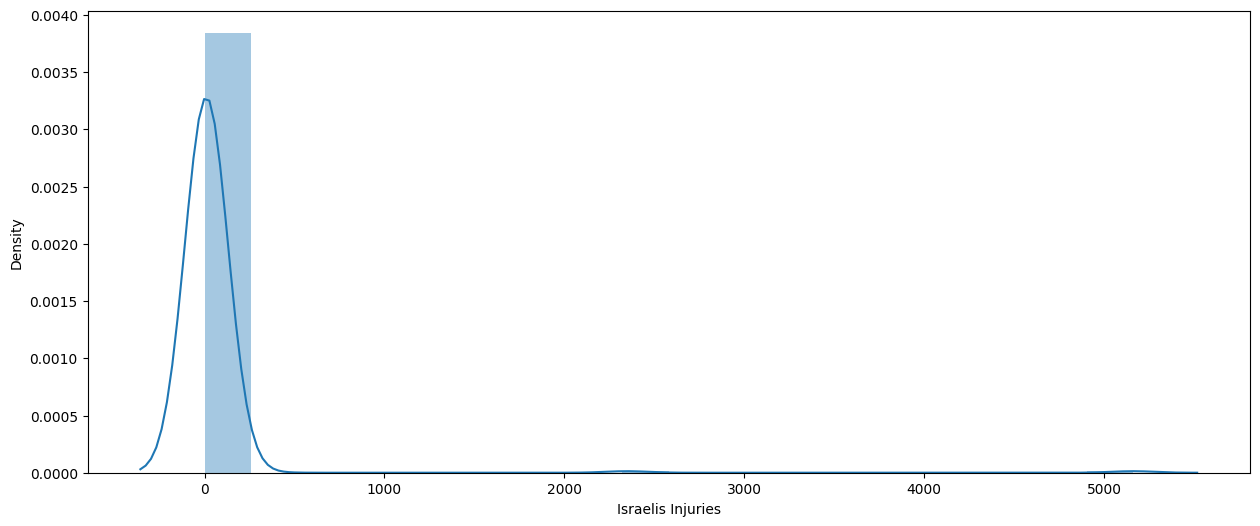

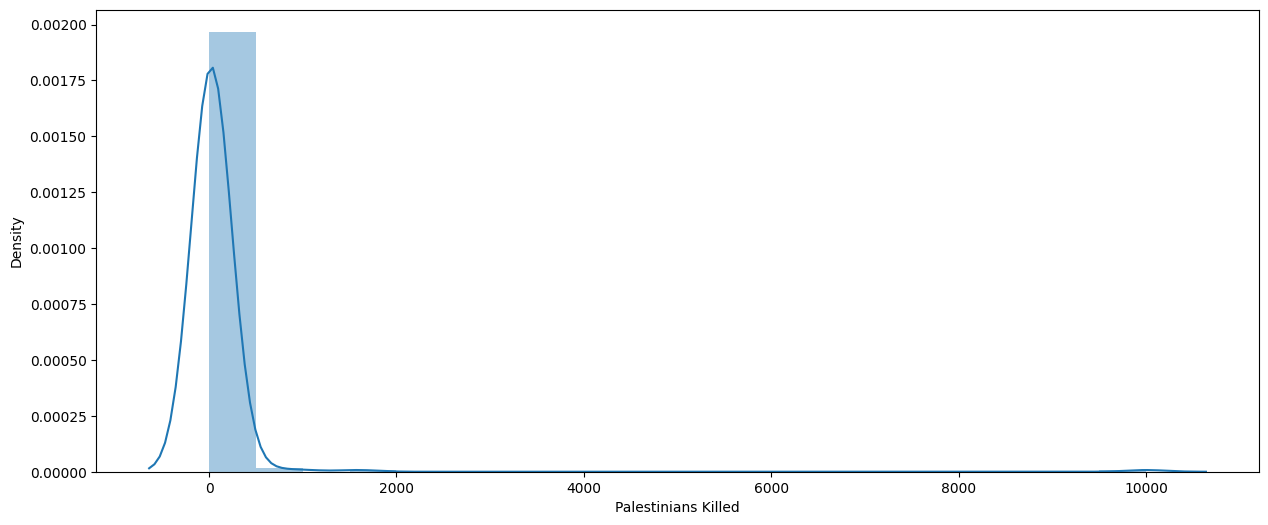

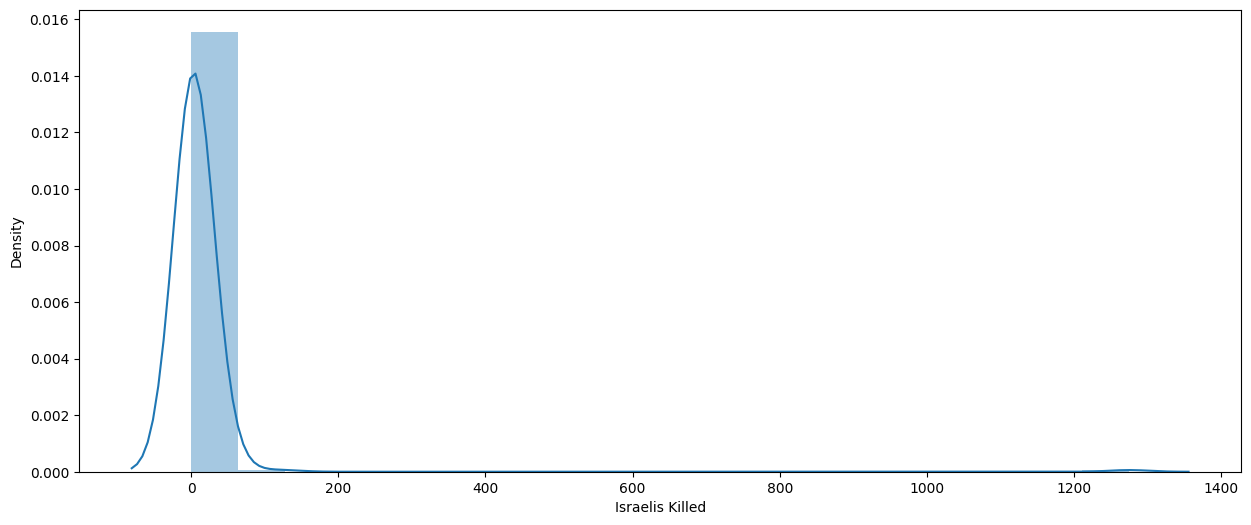

In [21]:
for i in database1.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(database1[i], kde=True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

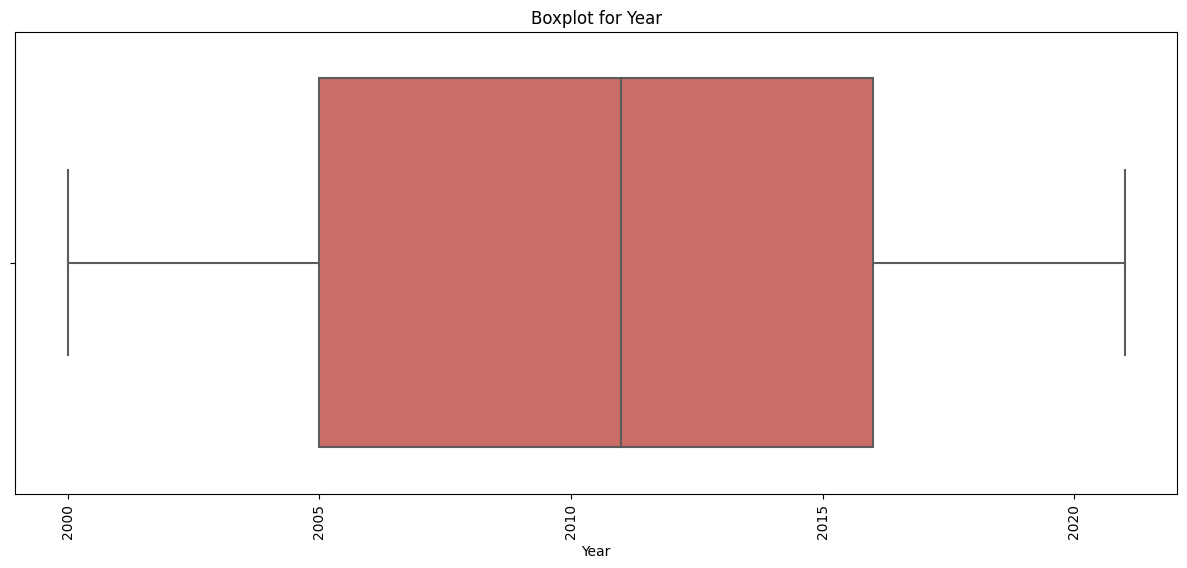

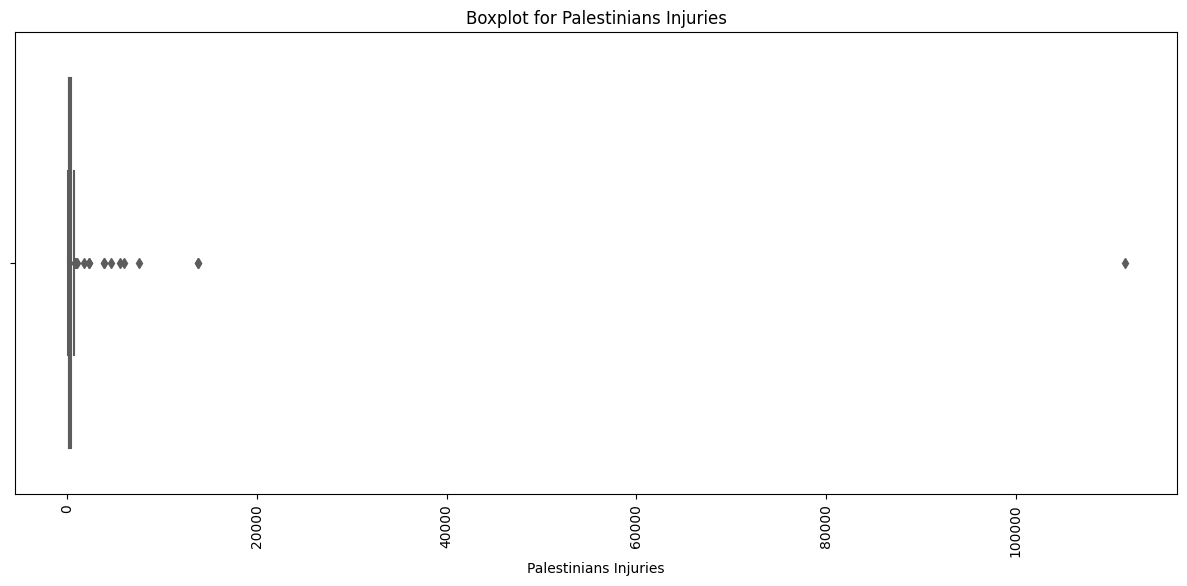

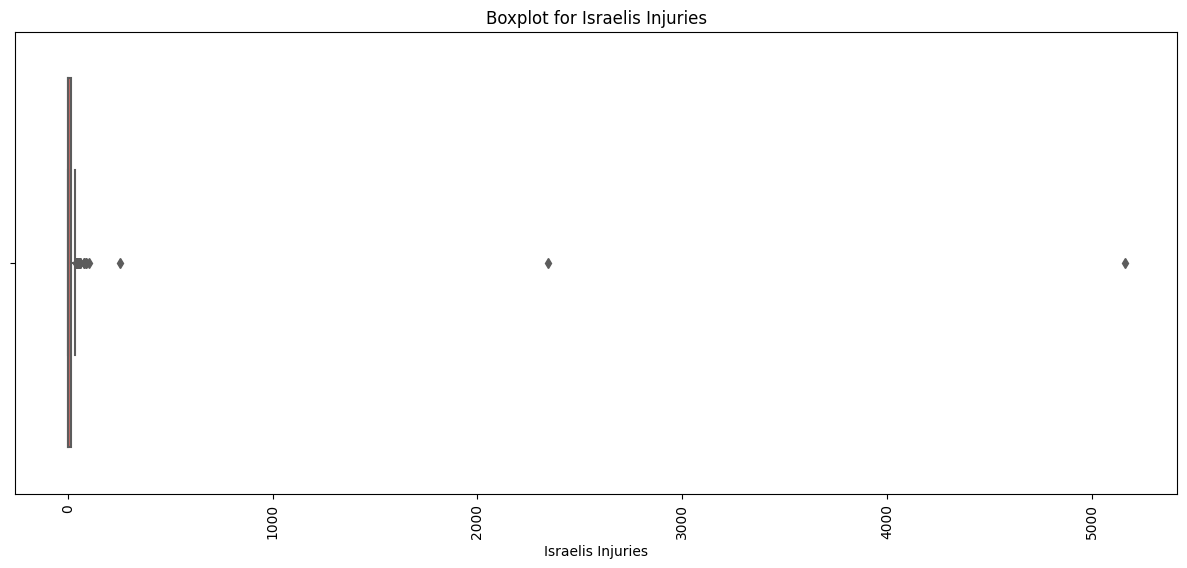

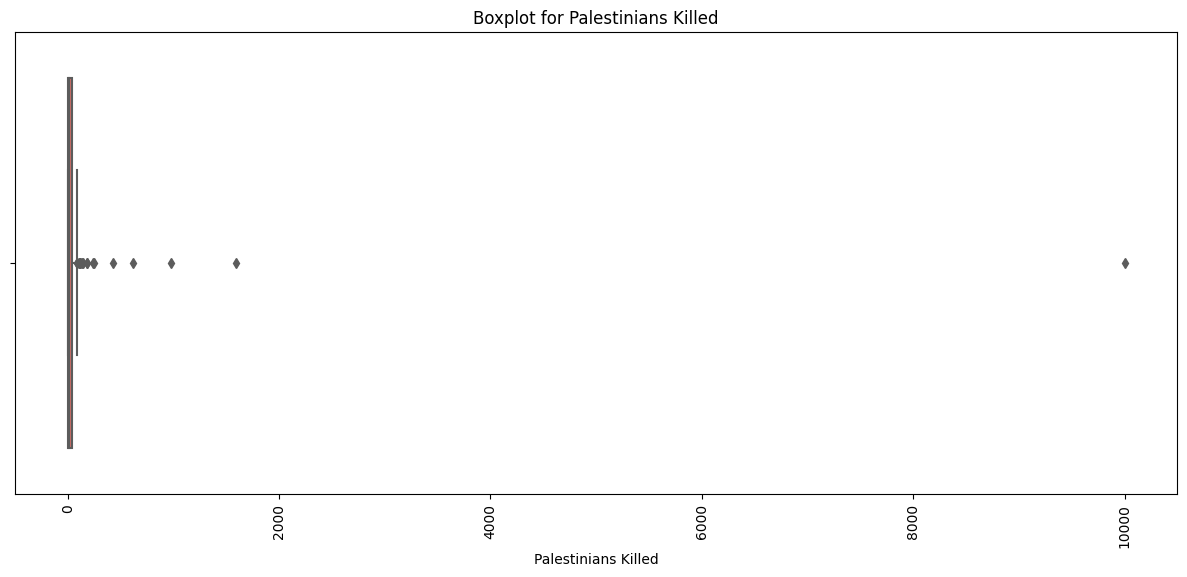

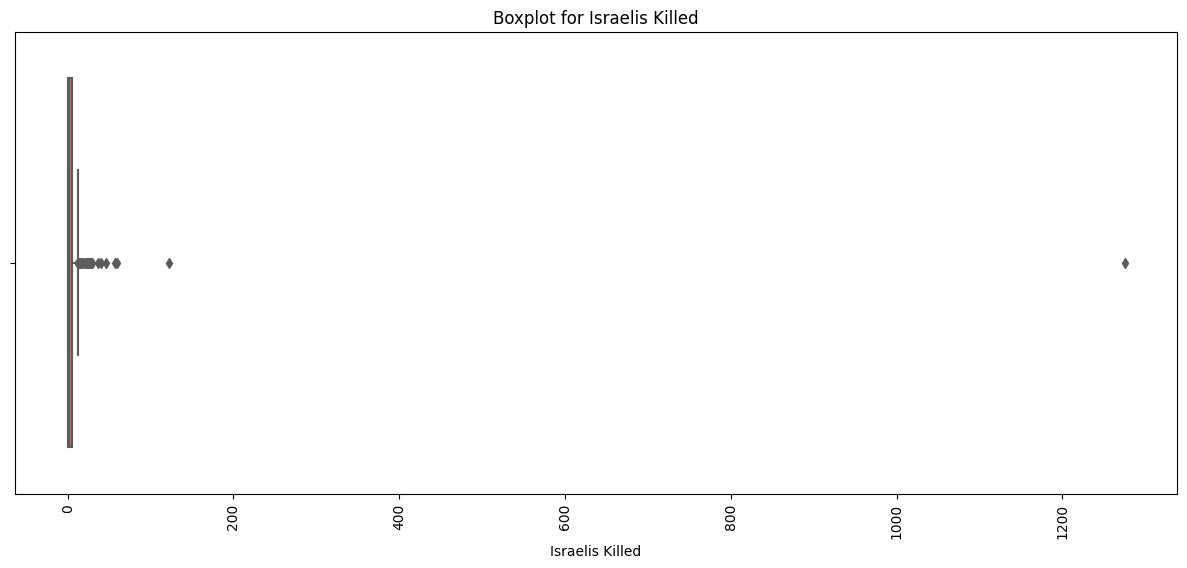

In [22]:
for column_name in database1.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=database1[column_name], palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot for {column_name}')
    plt.show

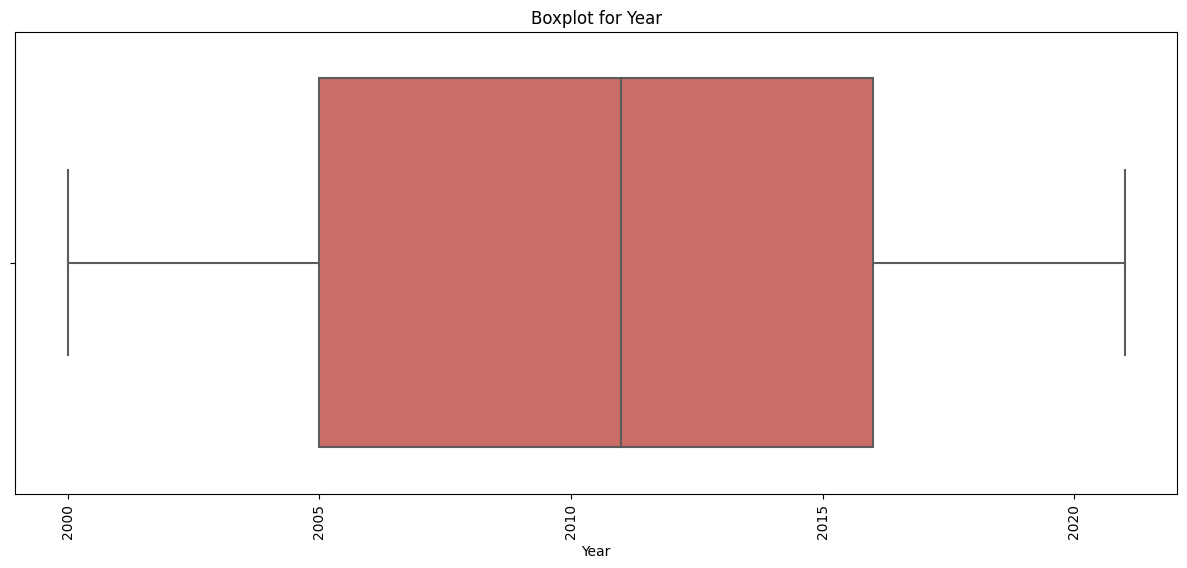

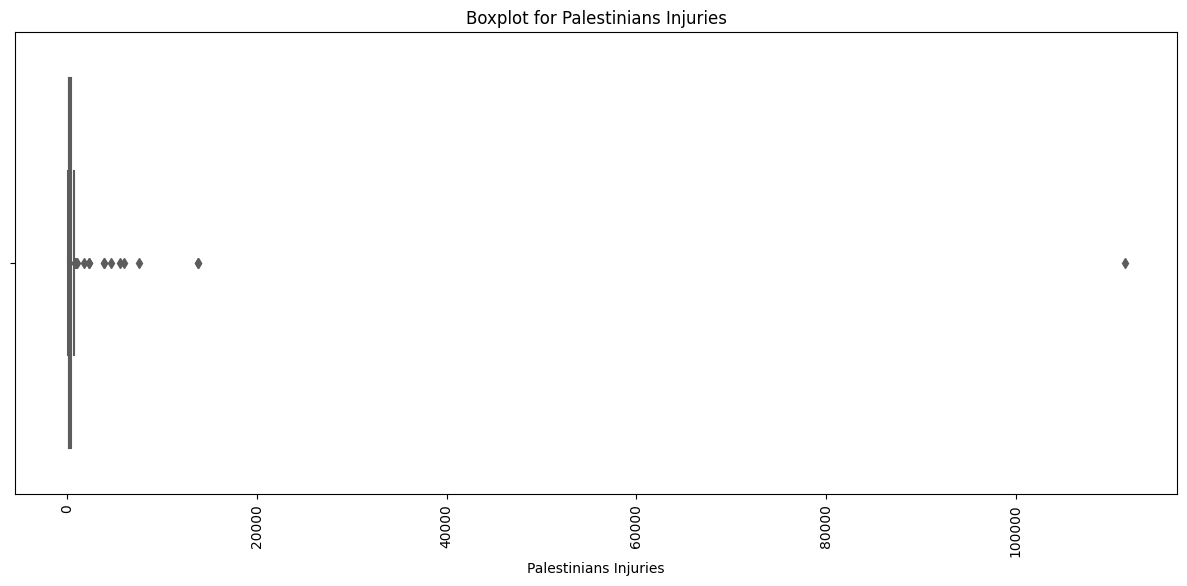

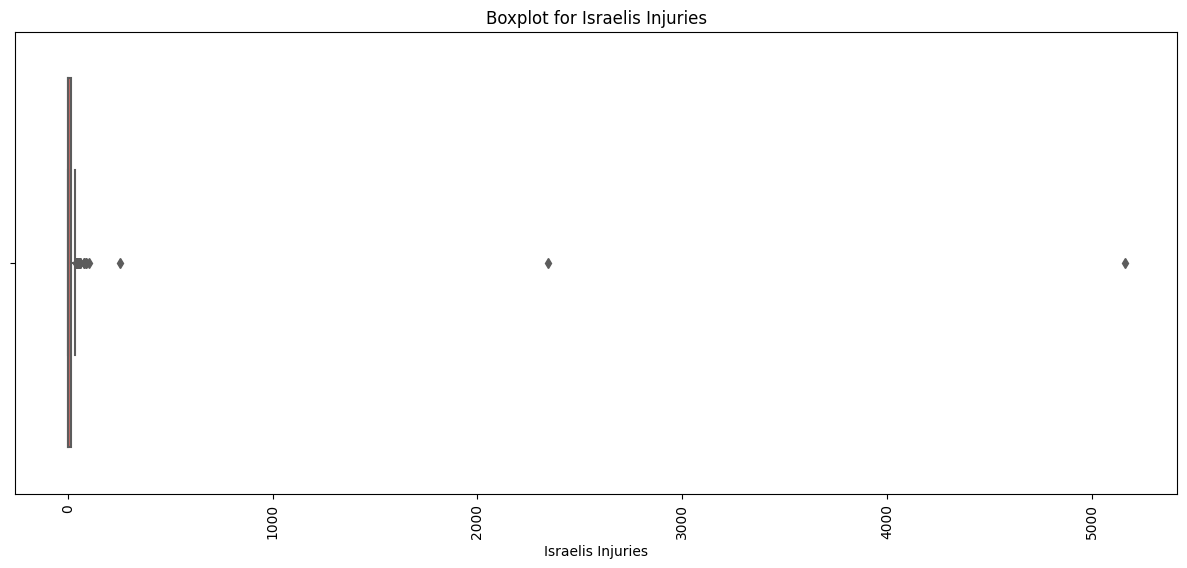

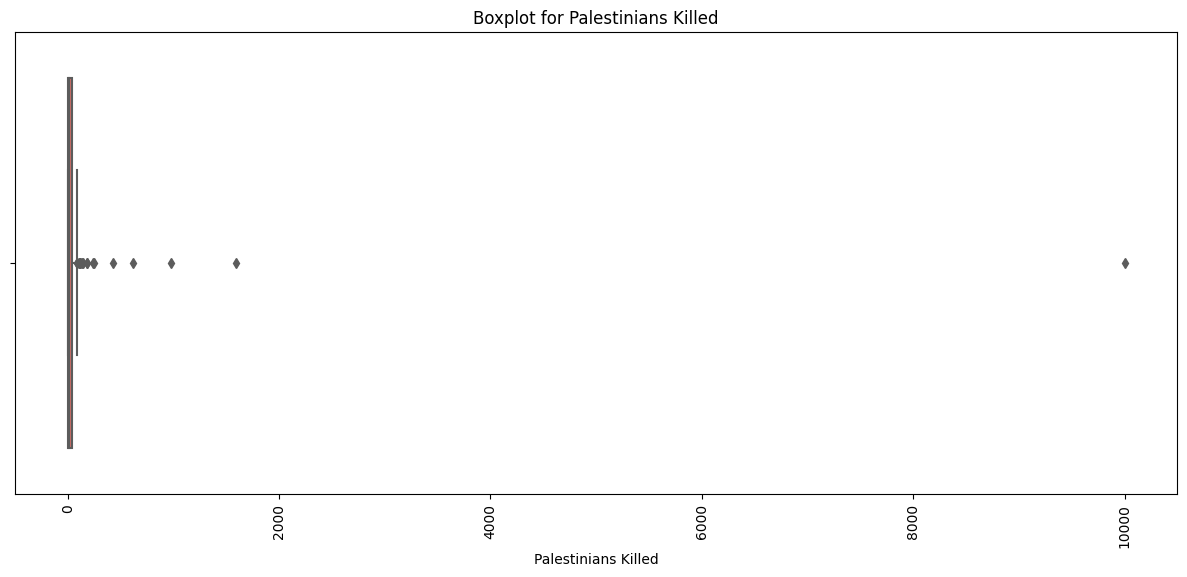

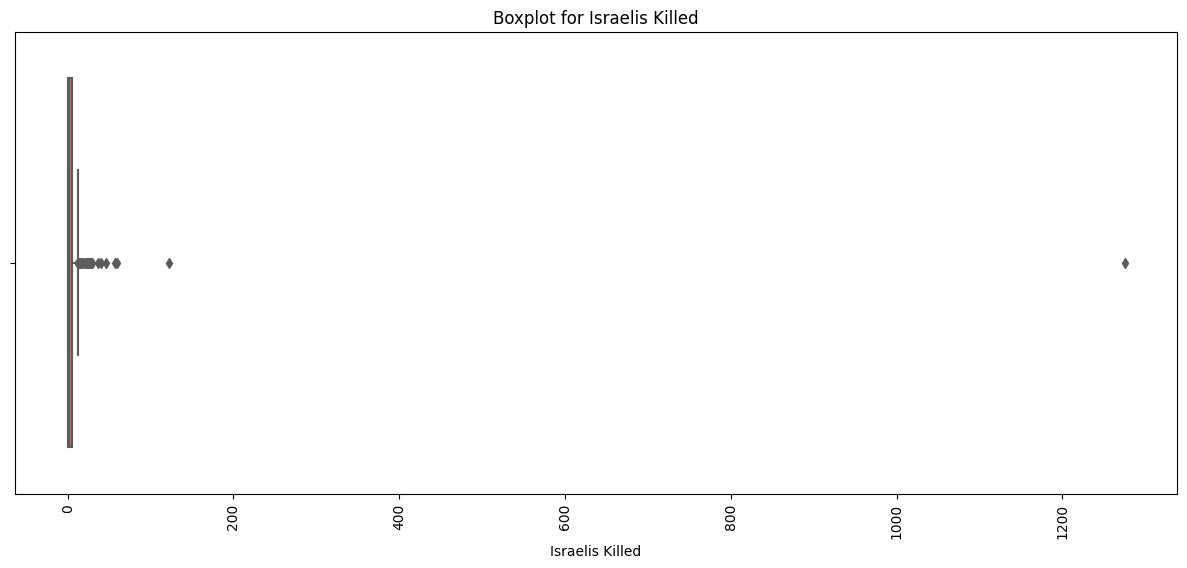

In [23]:
for column_name in database1.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=database1[column_name], palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot for {column_name}')
    plt.show()

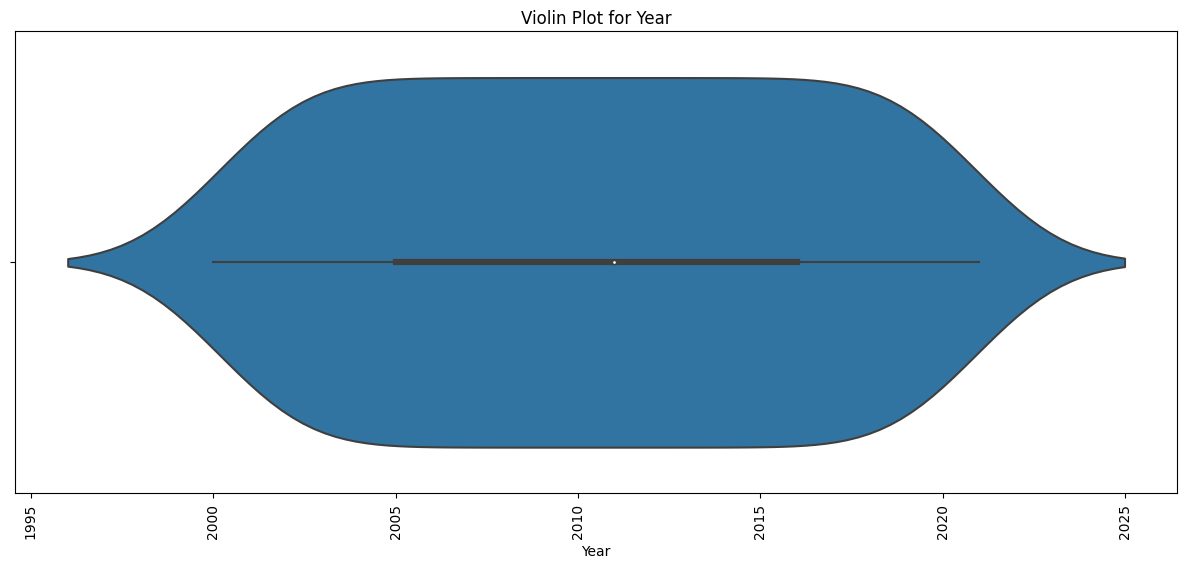

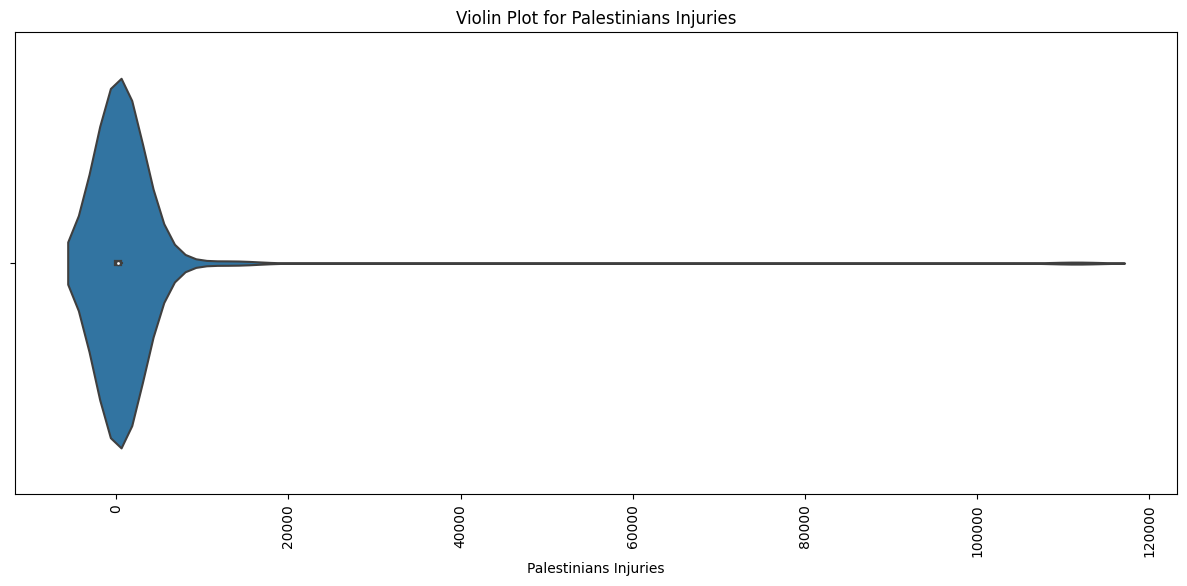

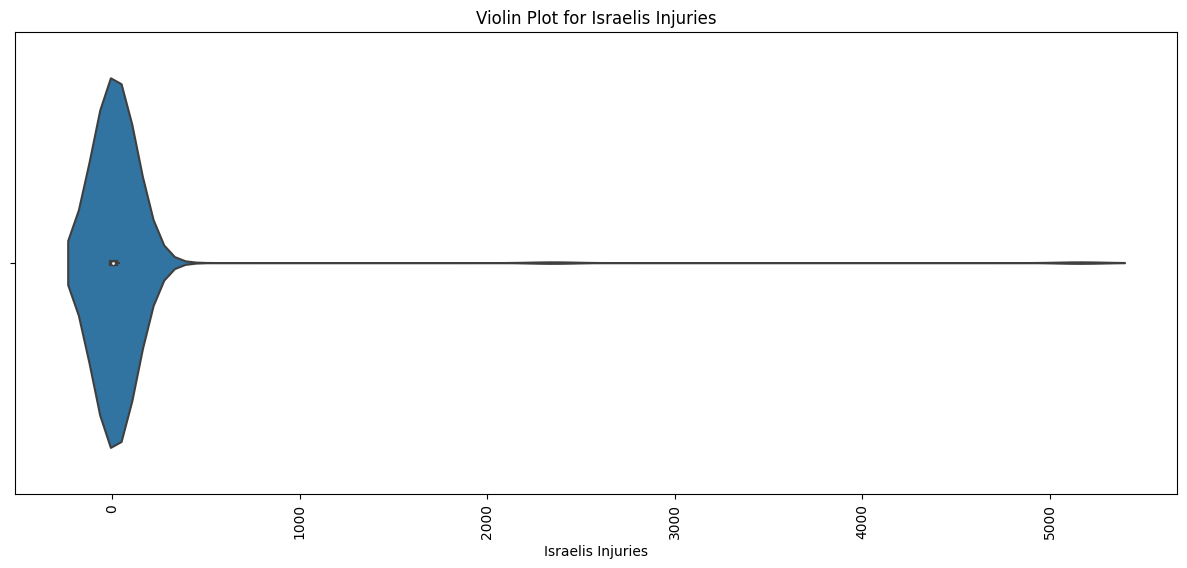

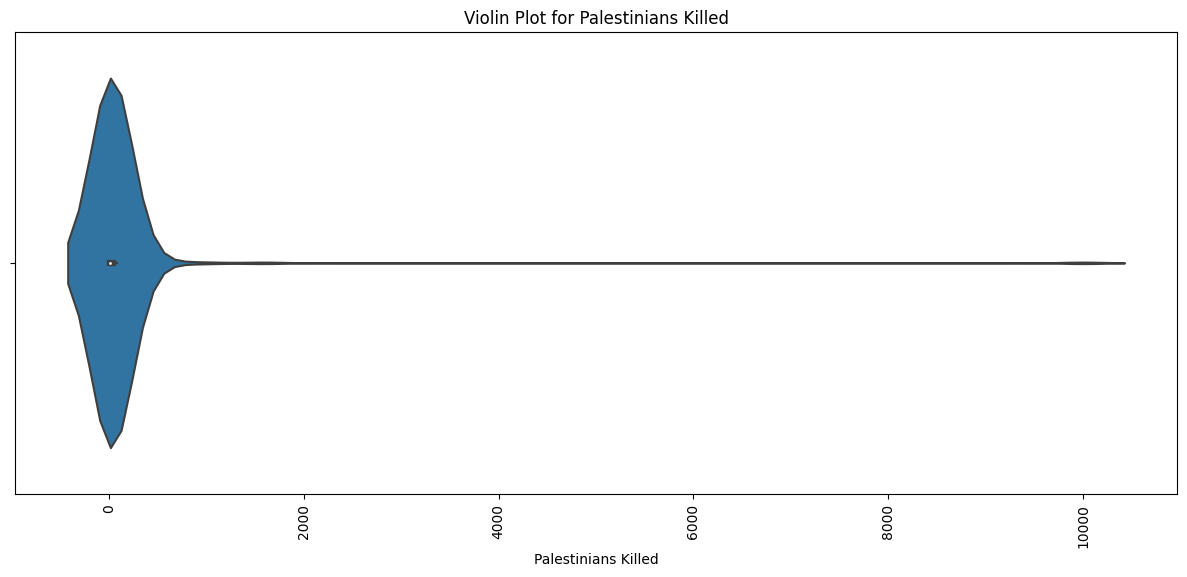

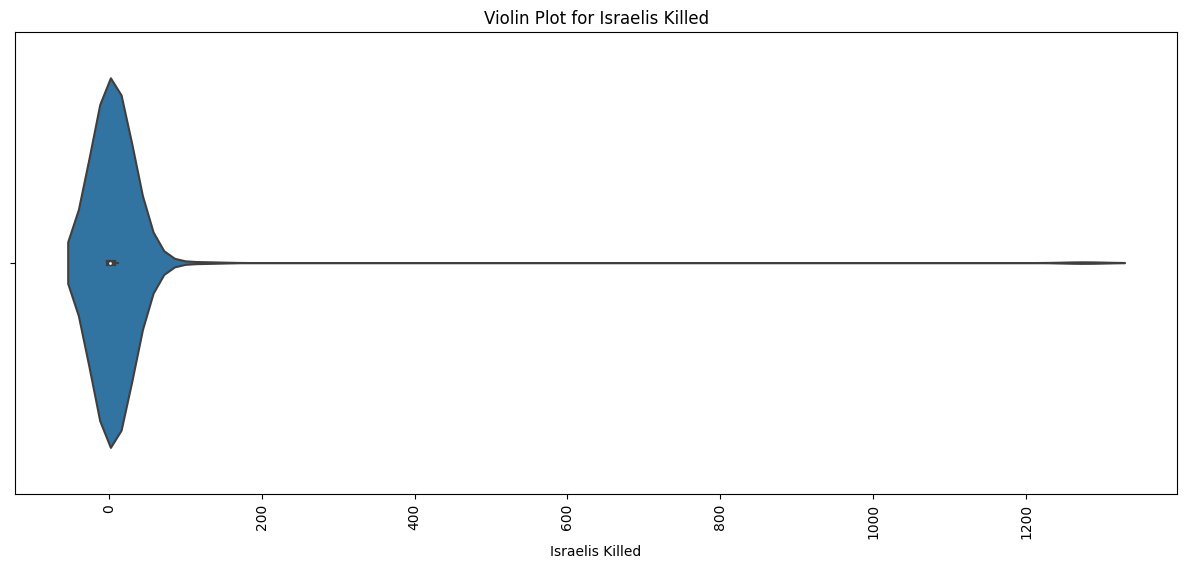

In [24]:
for column_name in database1.columns:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=database1[column_name], pallete='his')
    plt.xticks(rotation=90)
    plt.title(f'Violin Plot for {column_name}')
    plt.show()

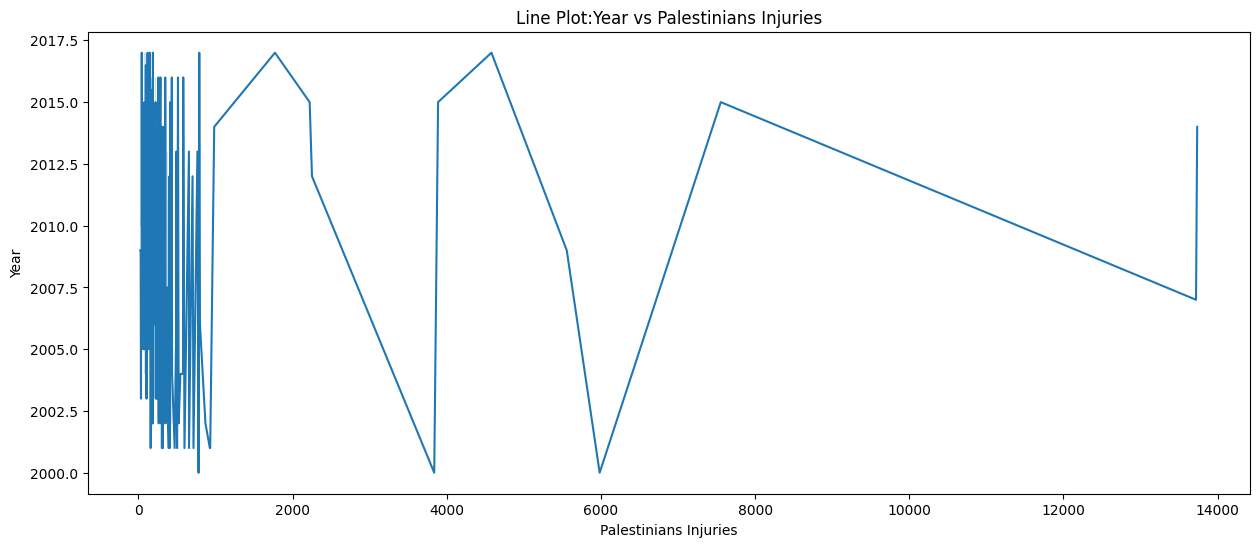

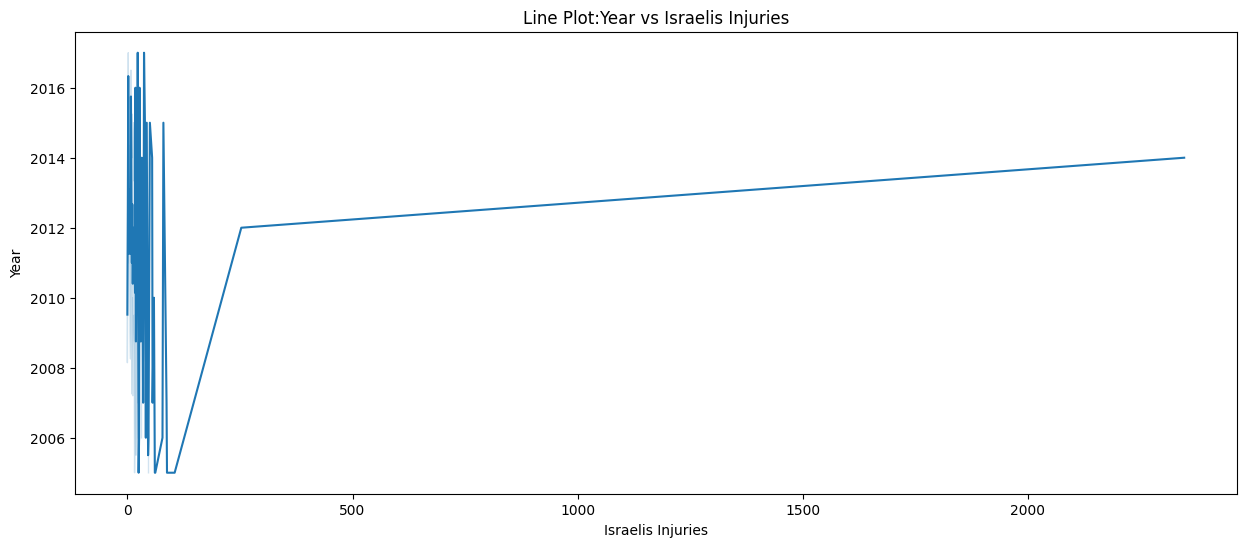

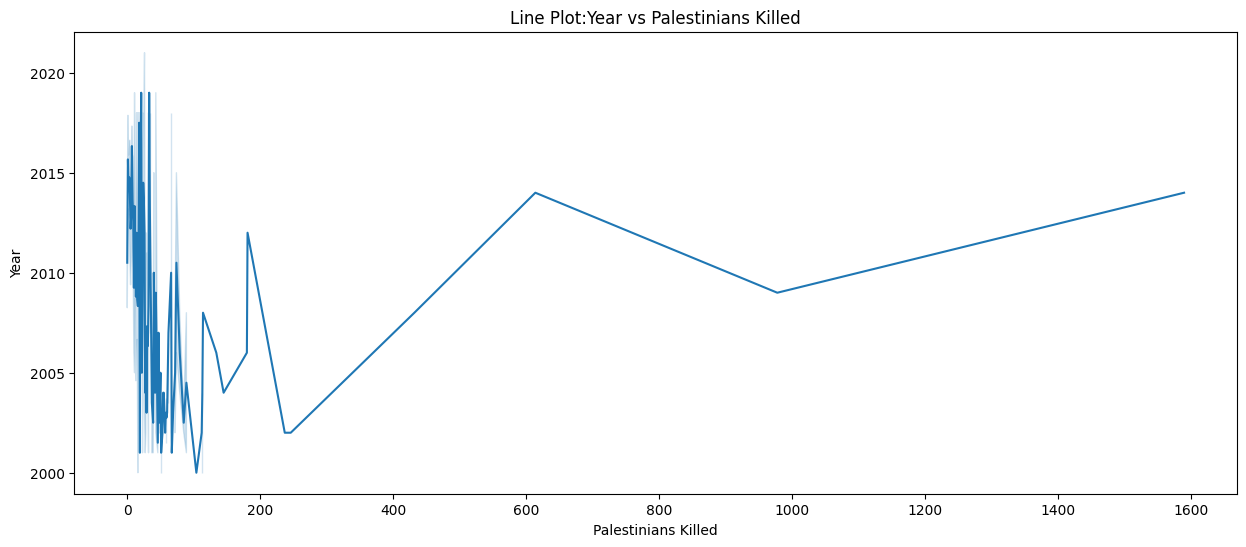

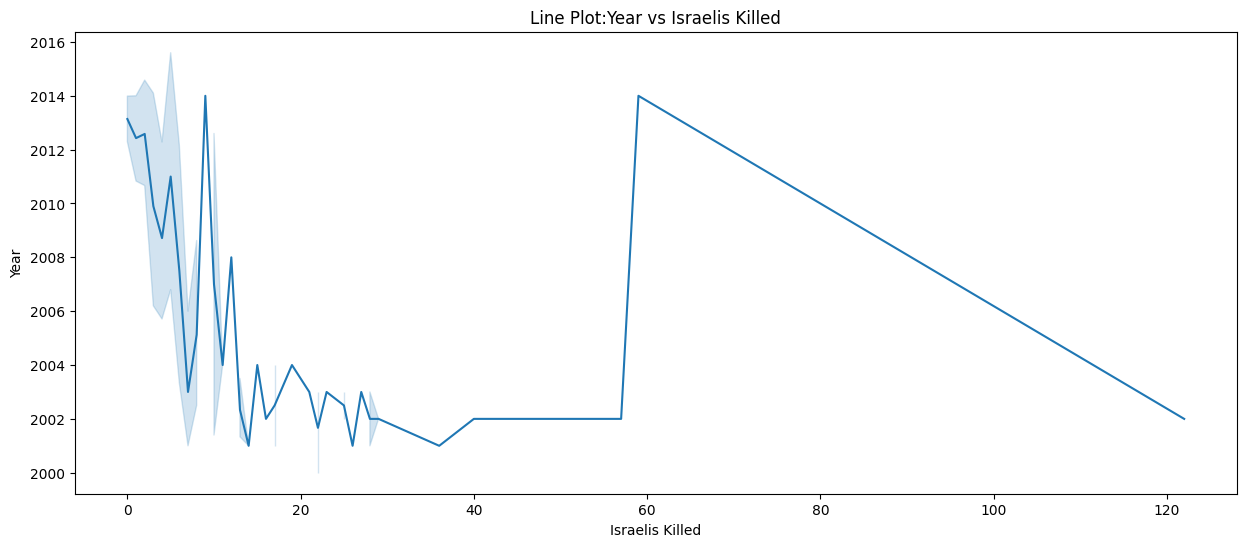

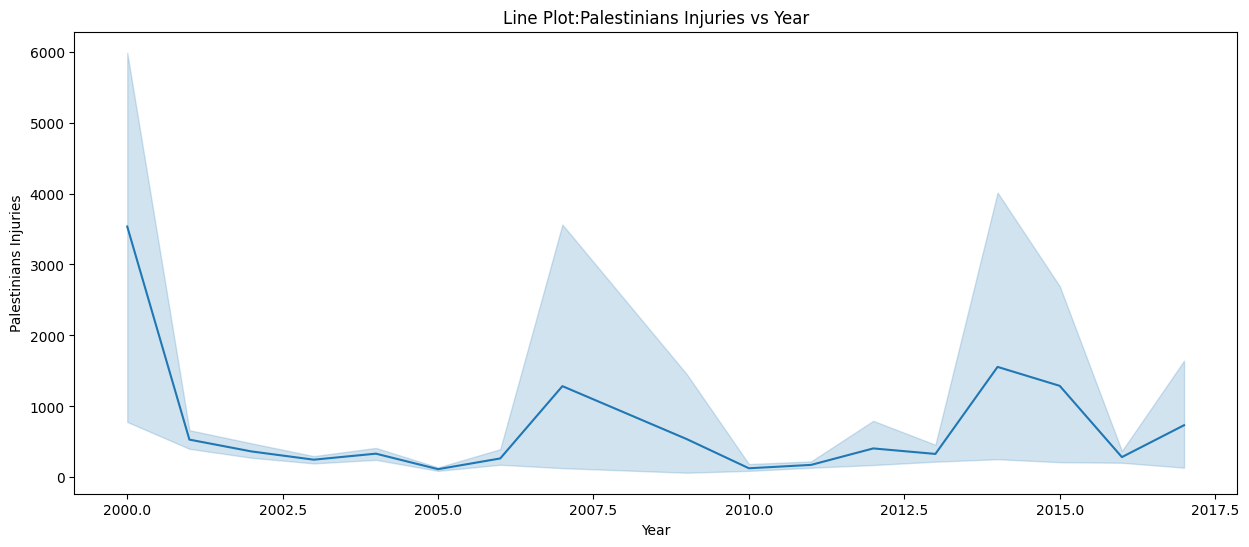

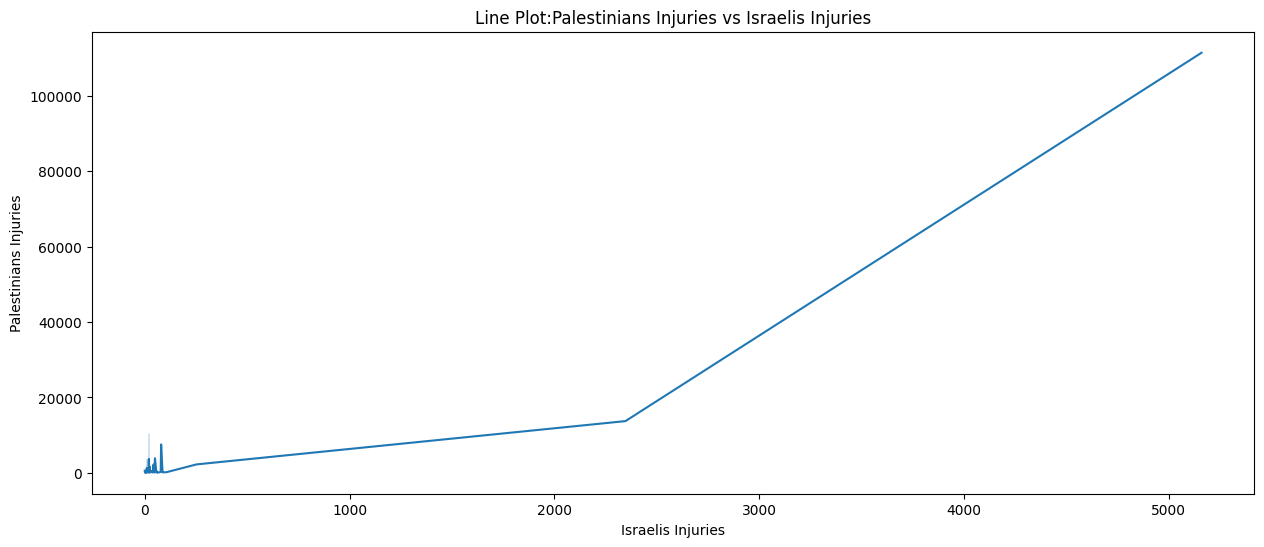

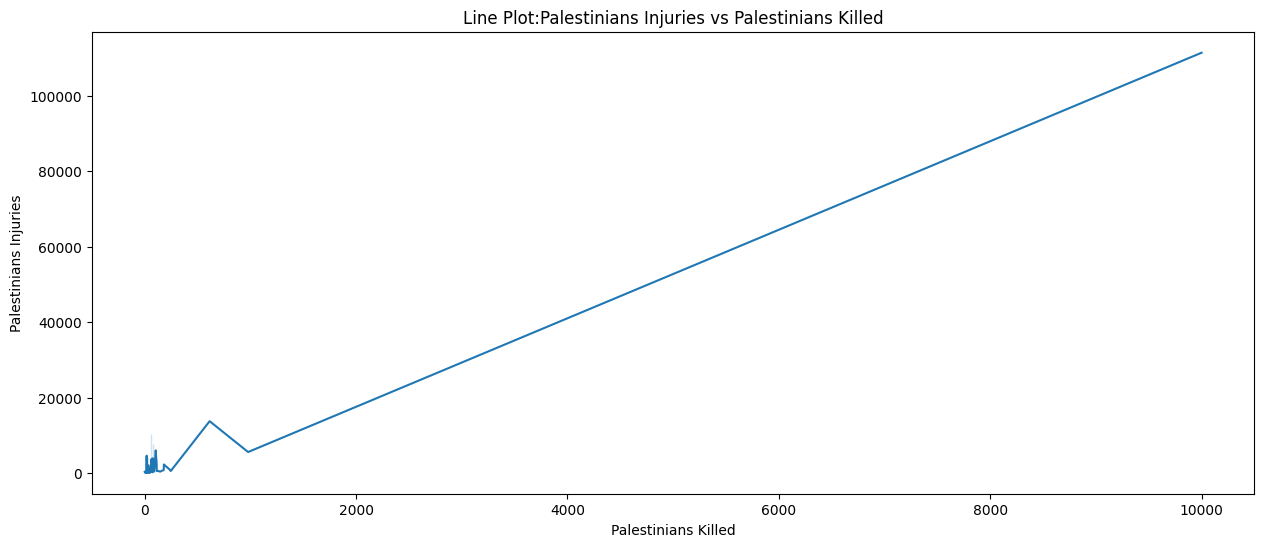

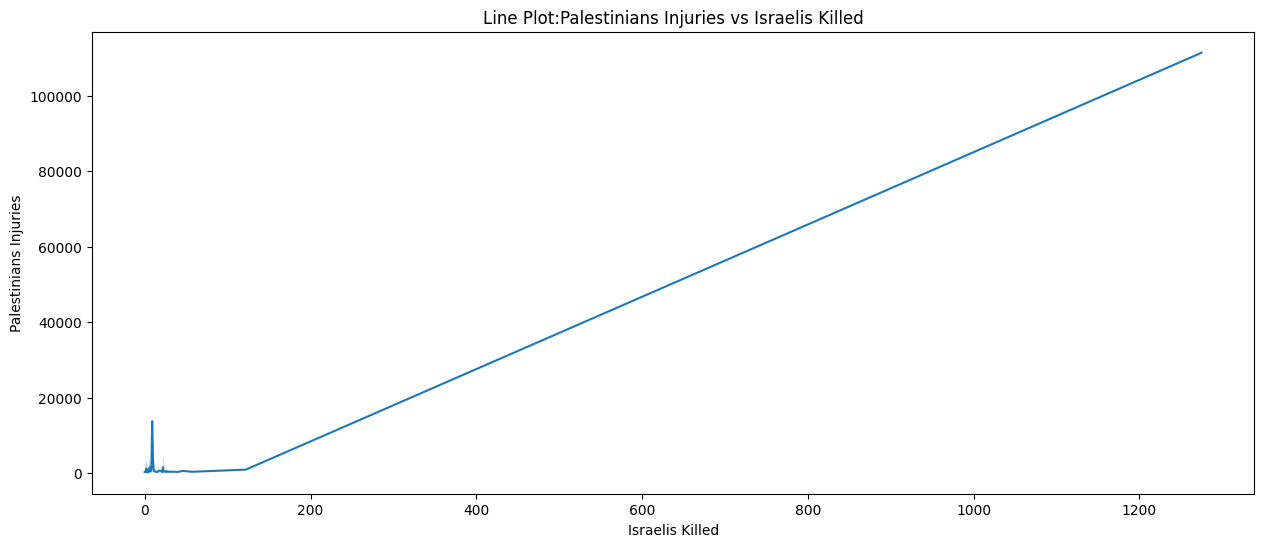

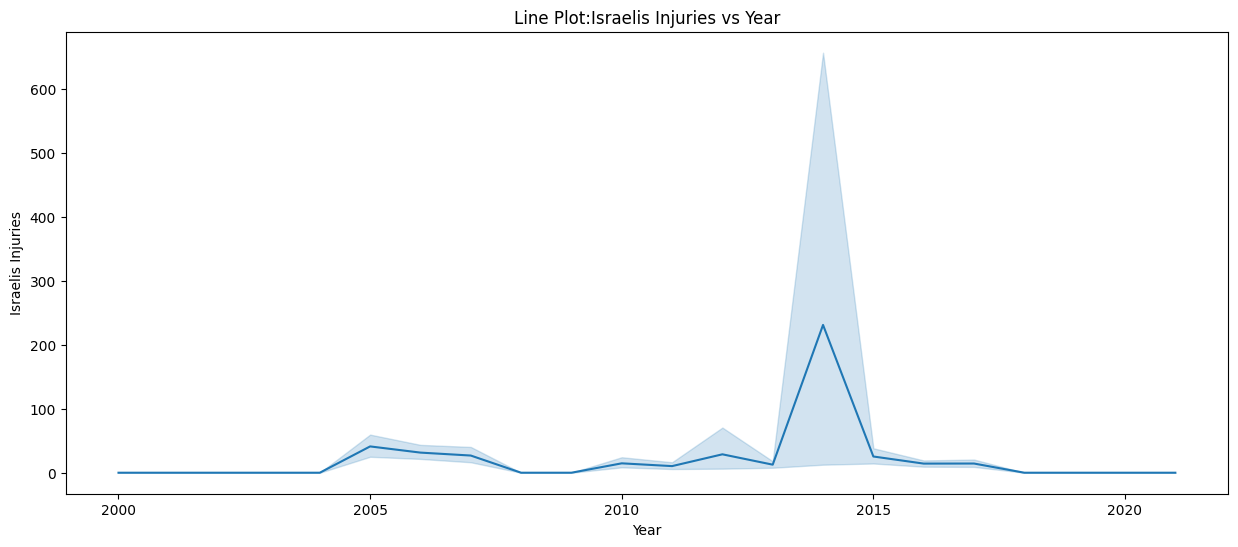

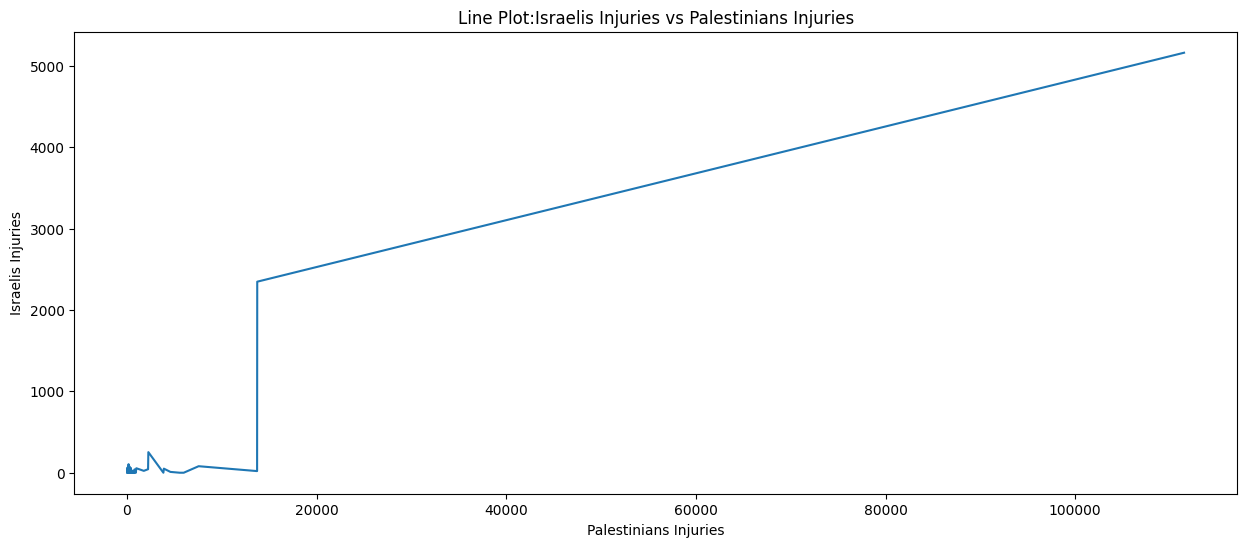

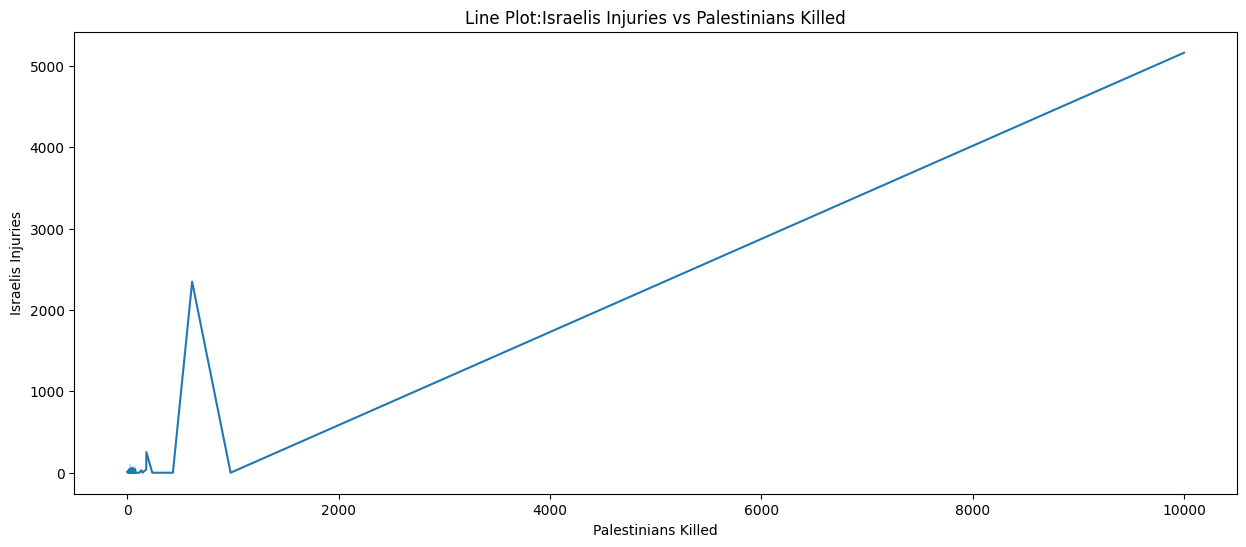

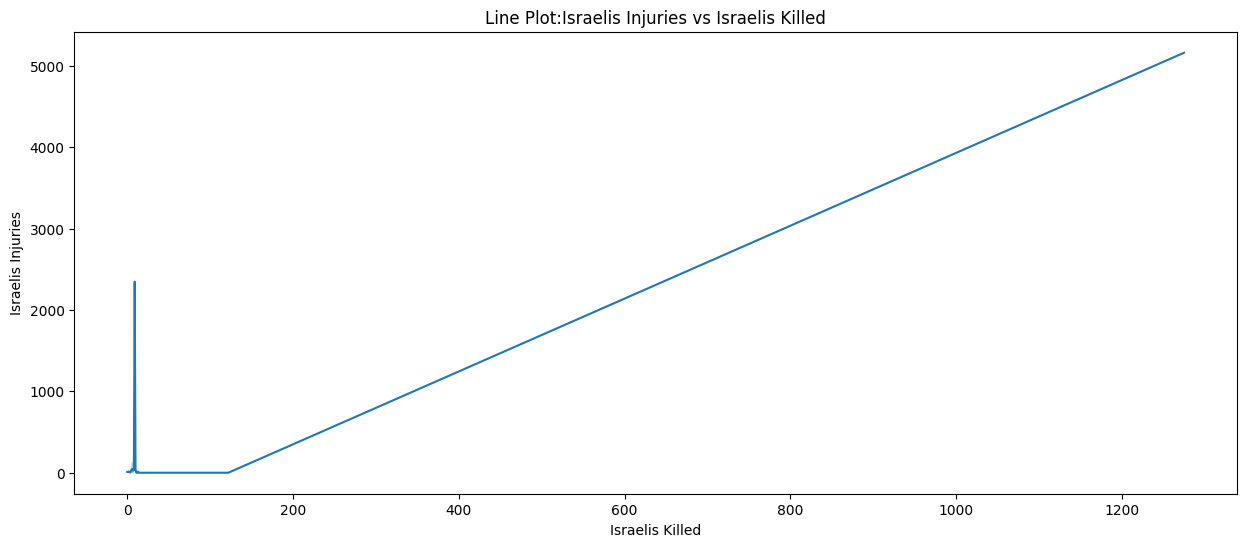

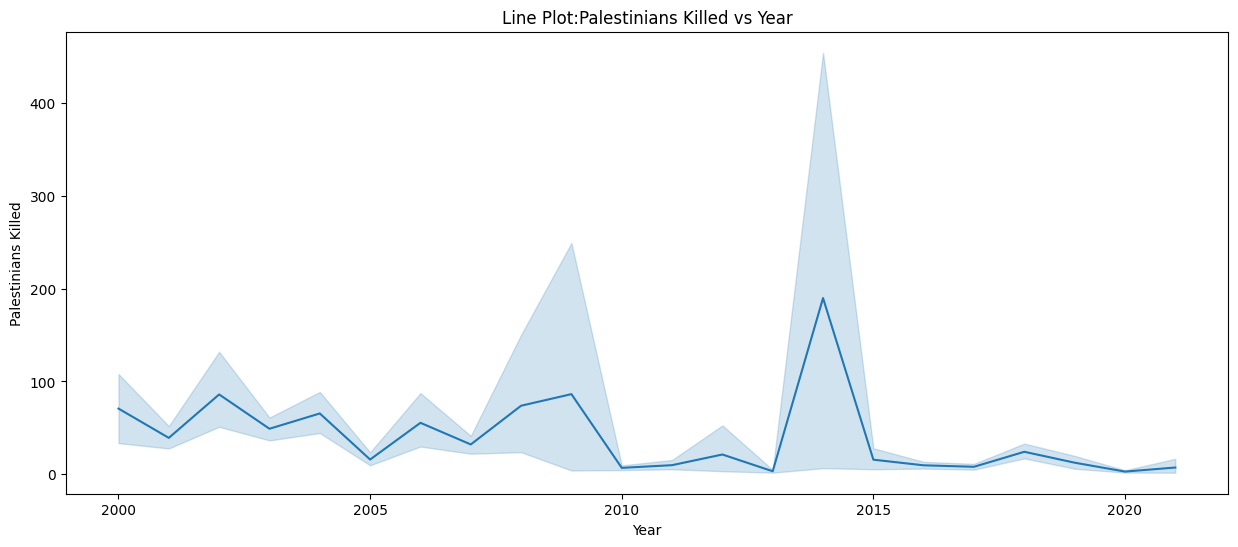

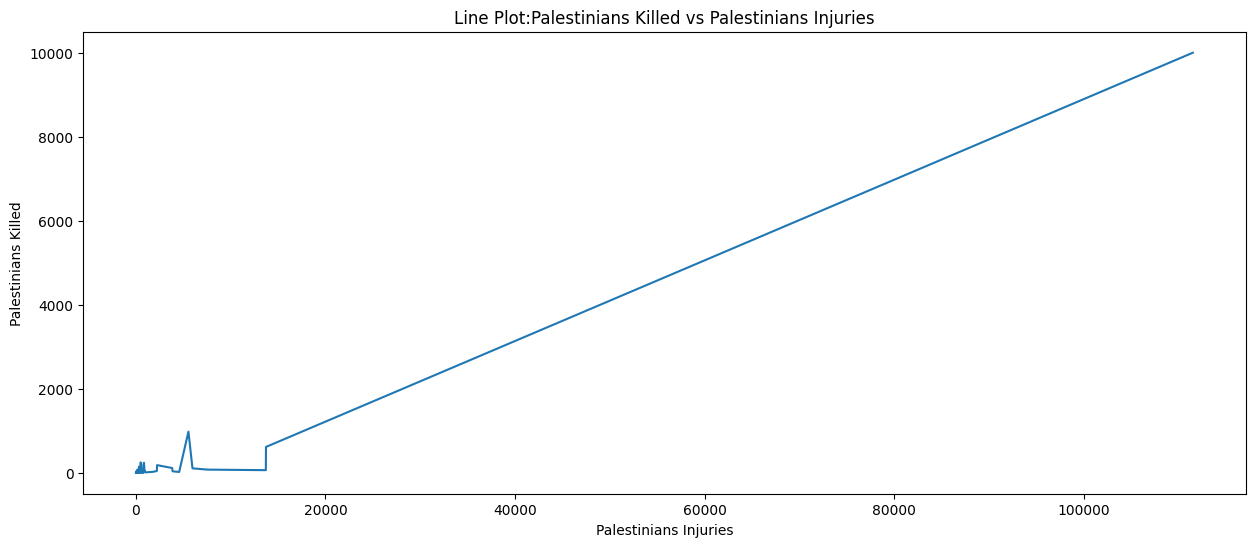

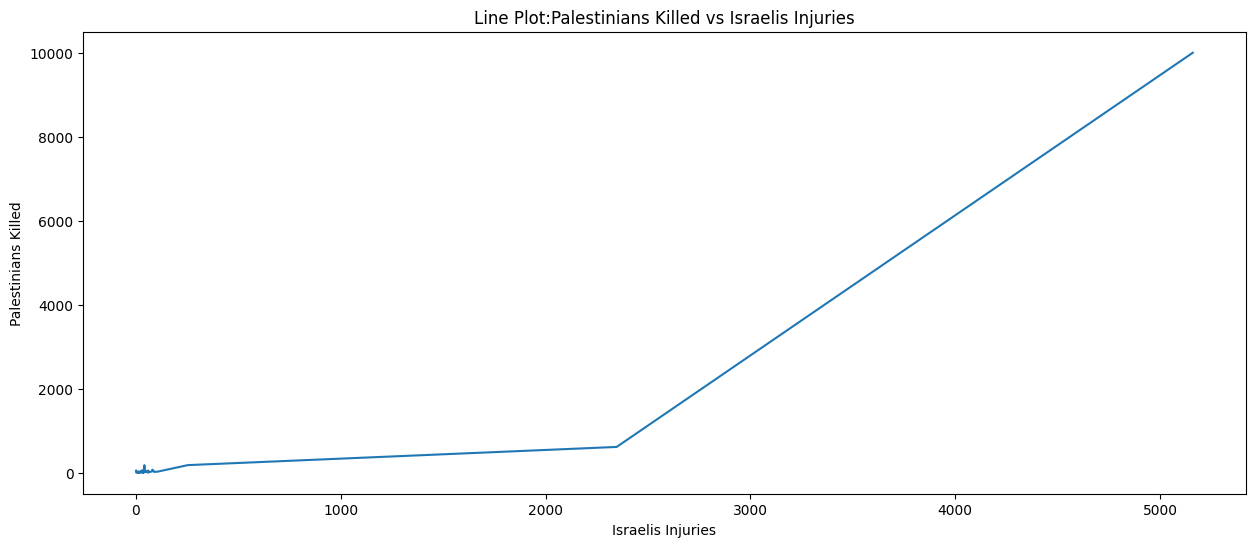

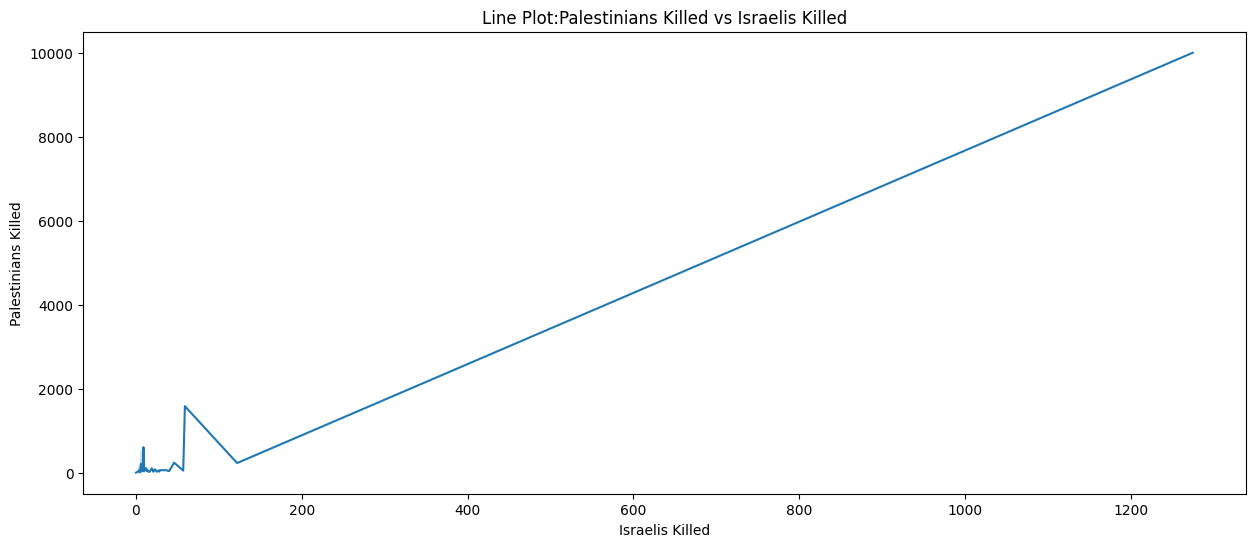

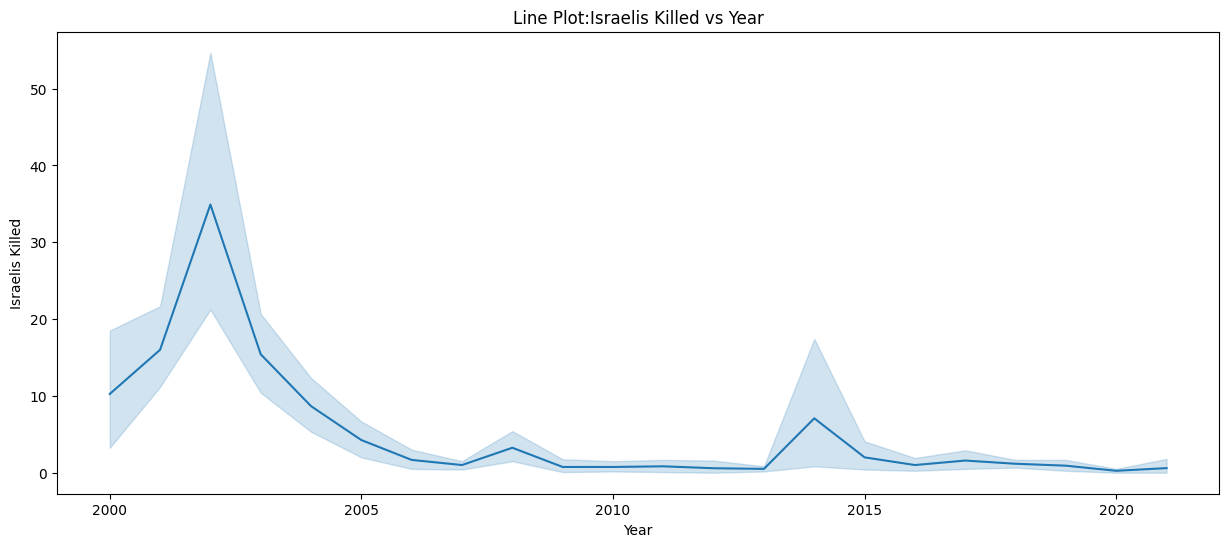

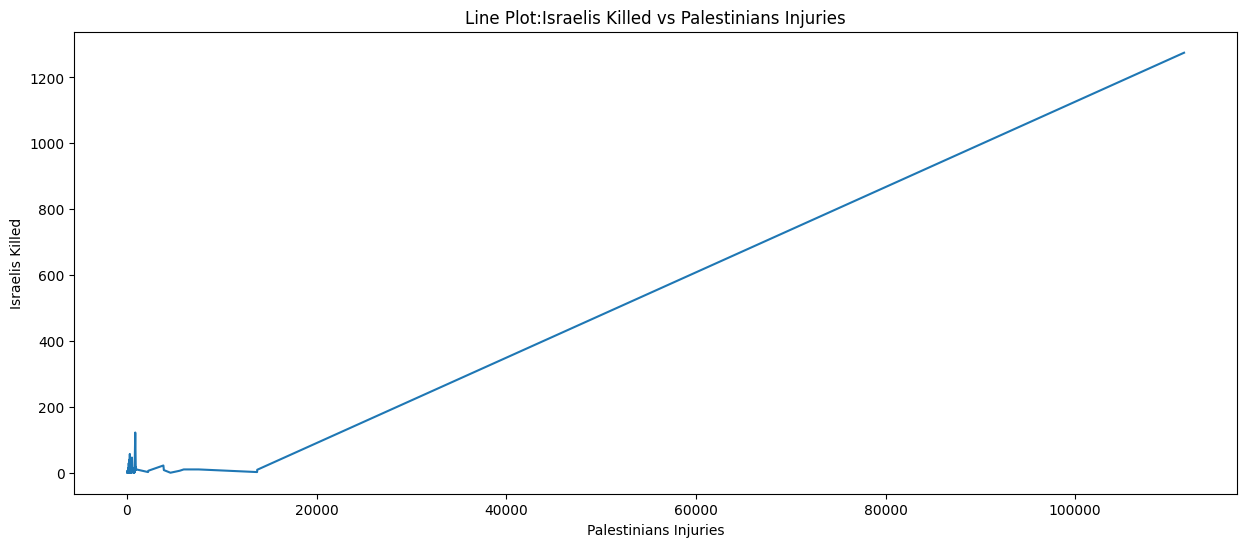

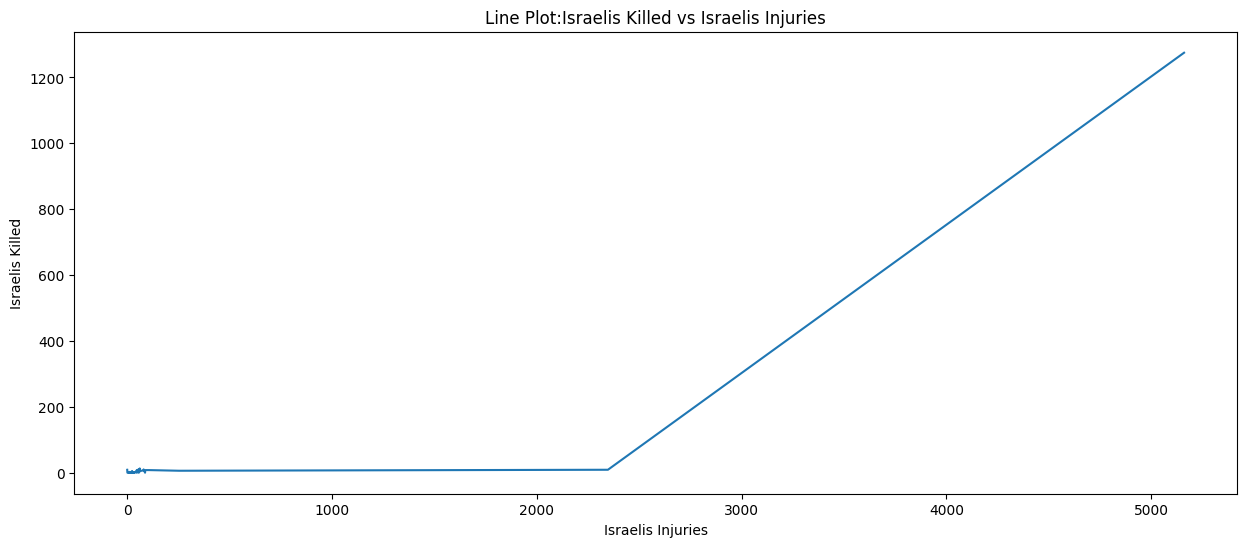

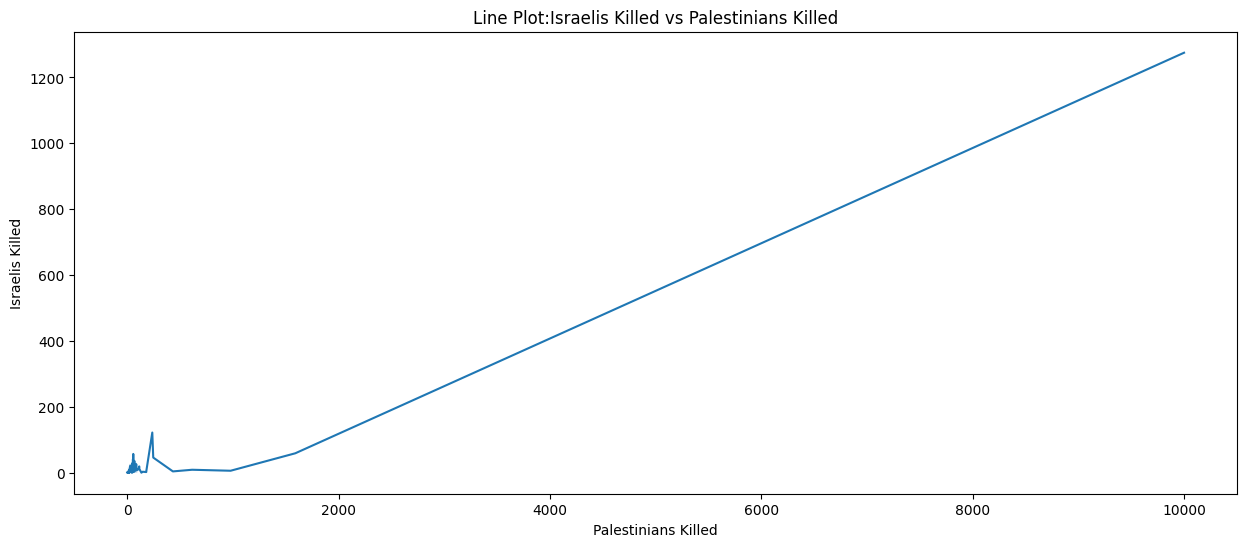

In [25]:
for i in database1.columns:
    for j in database1.columns:
        if i != j:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=database1[j], y=database1[i], data=database1, palette='his')
            plt.title(f'Line Plot:{i} vs {j}')
            plt.show()

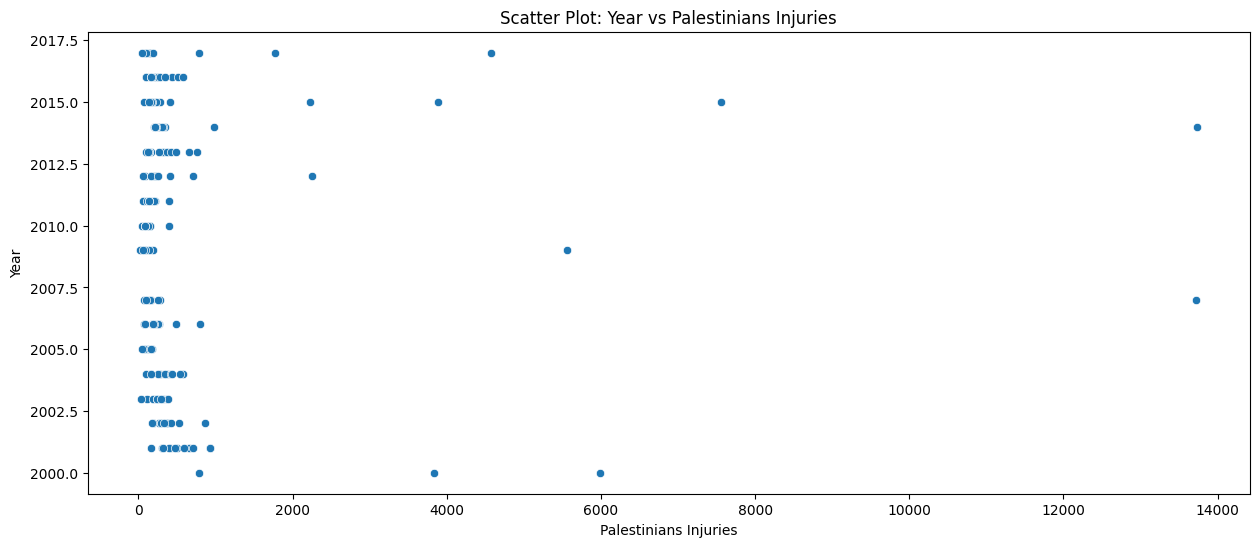

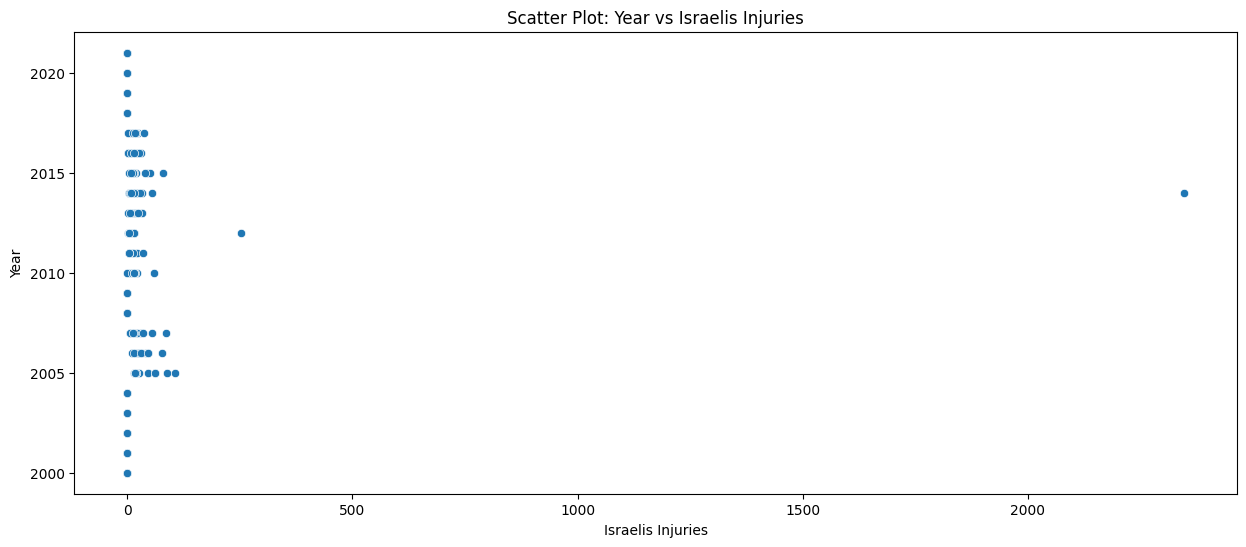

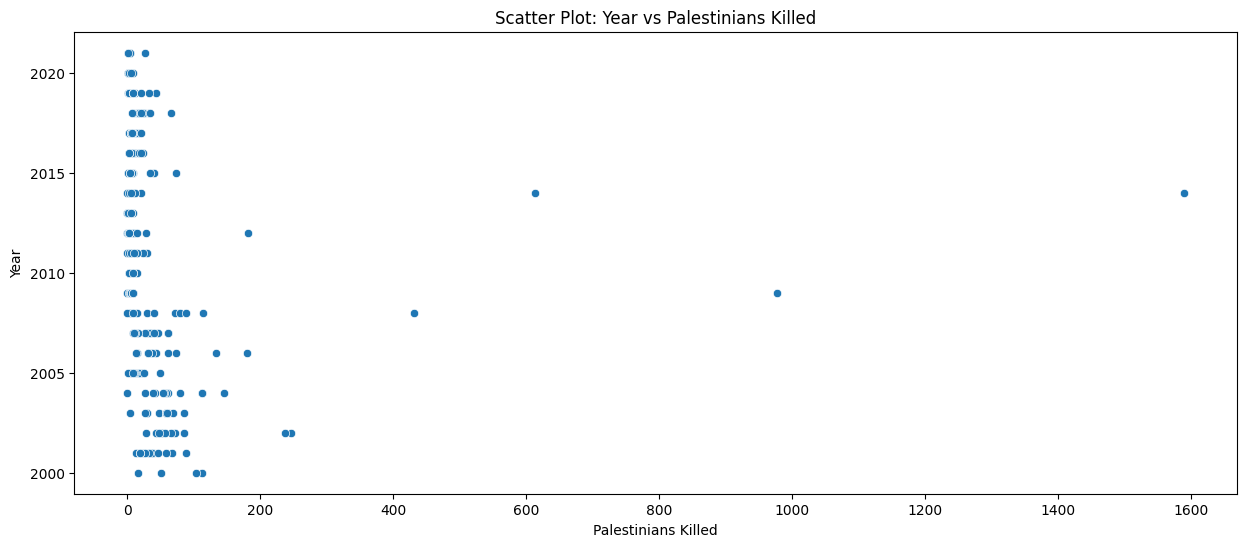

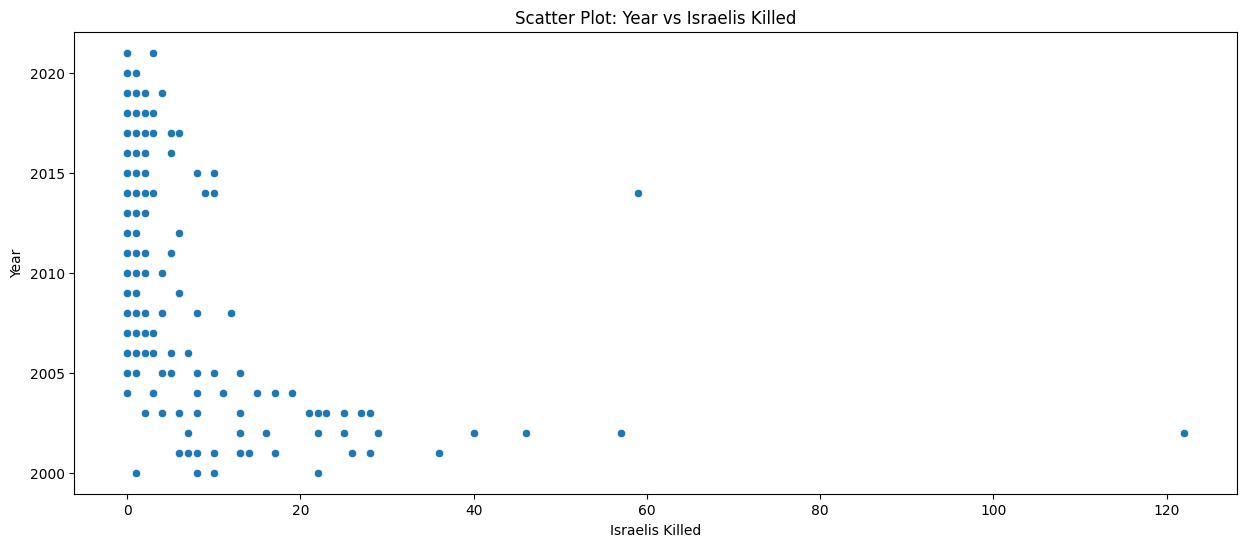

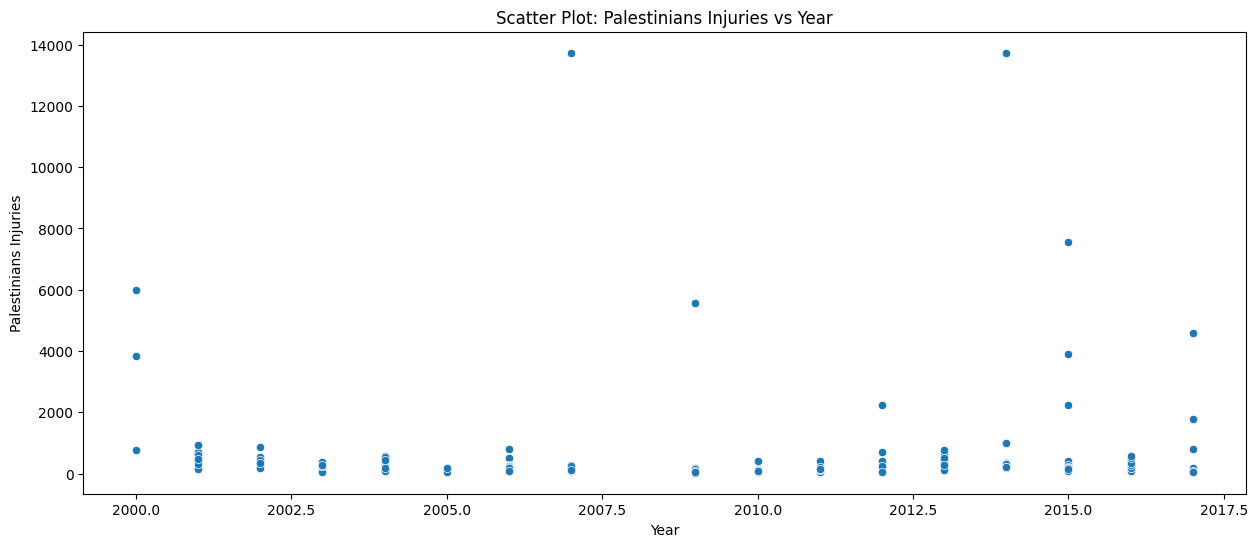

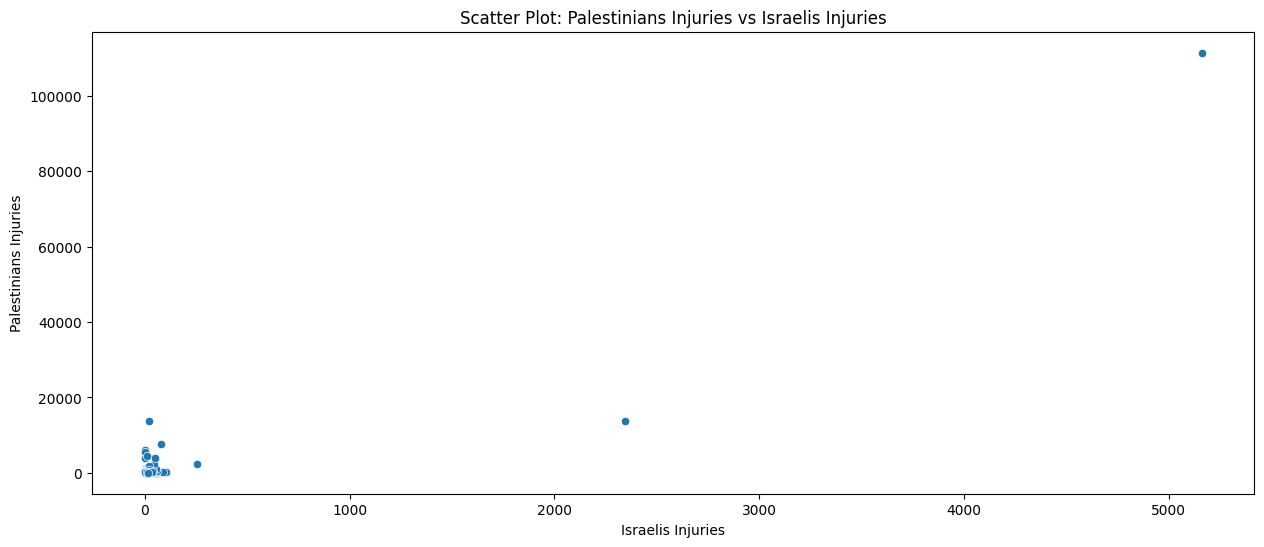

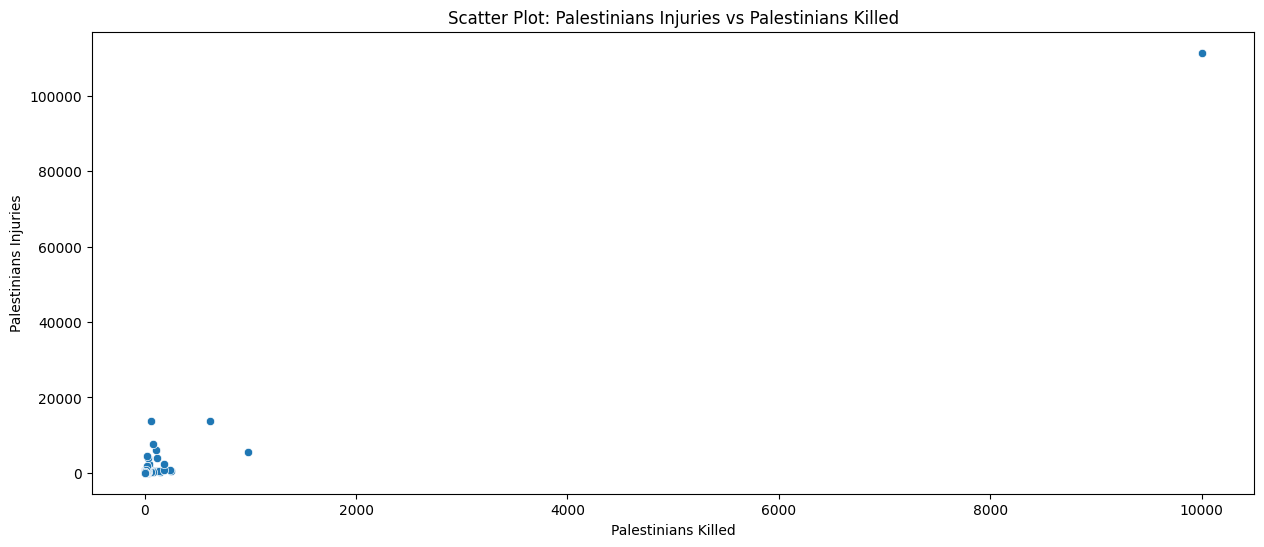

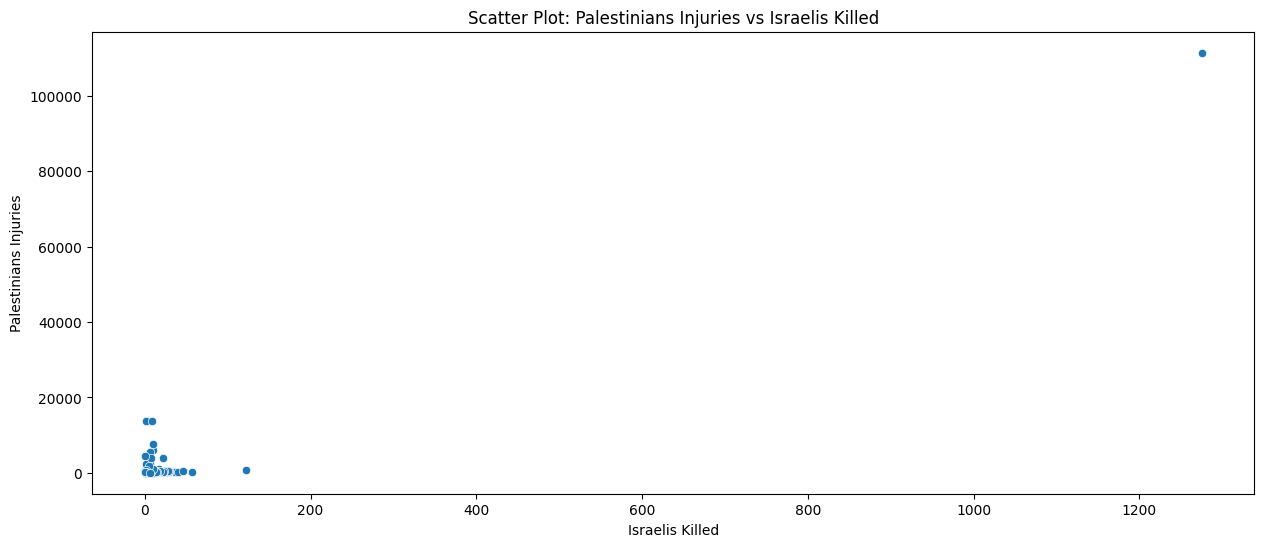

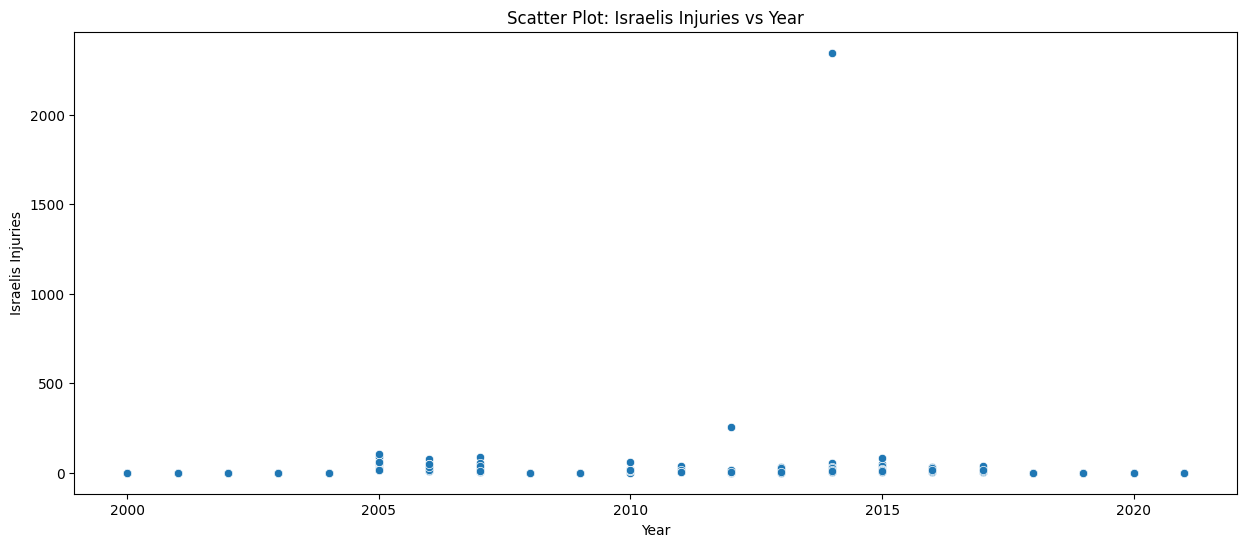

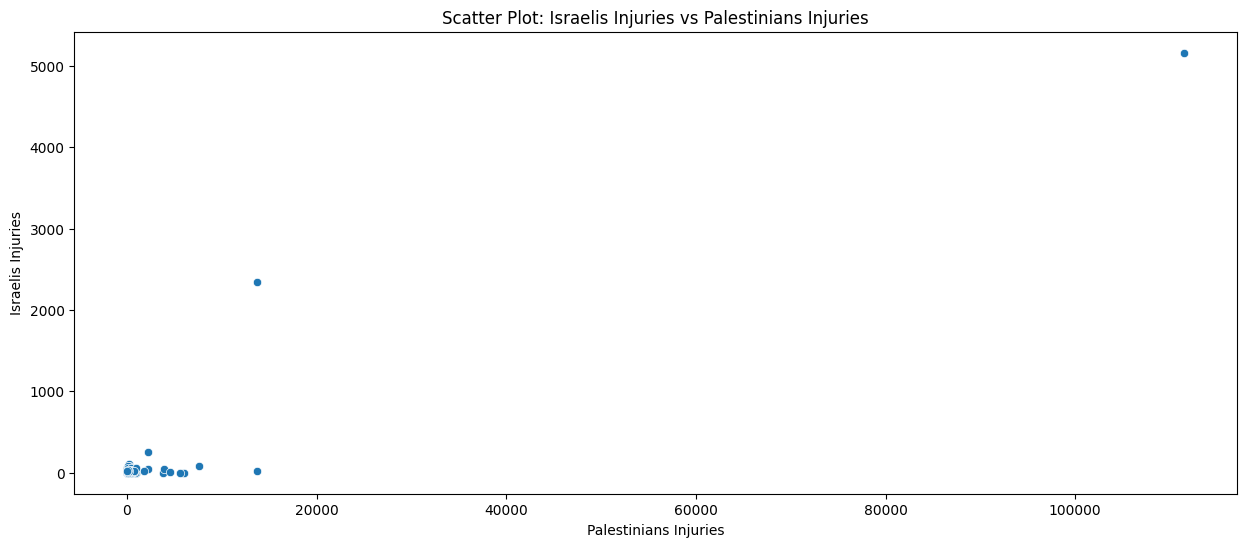

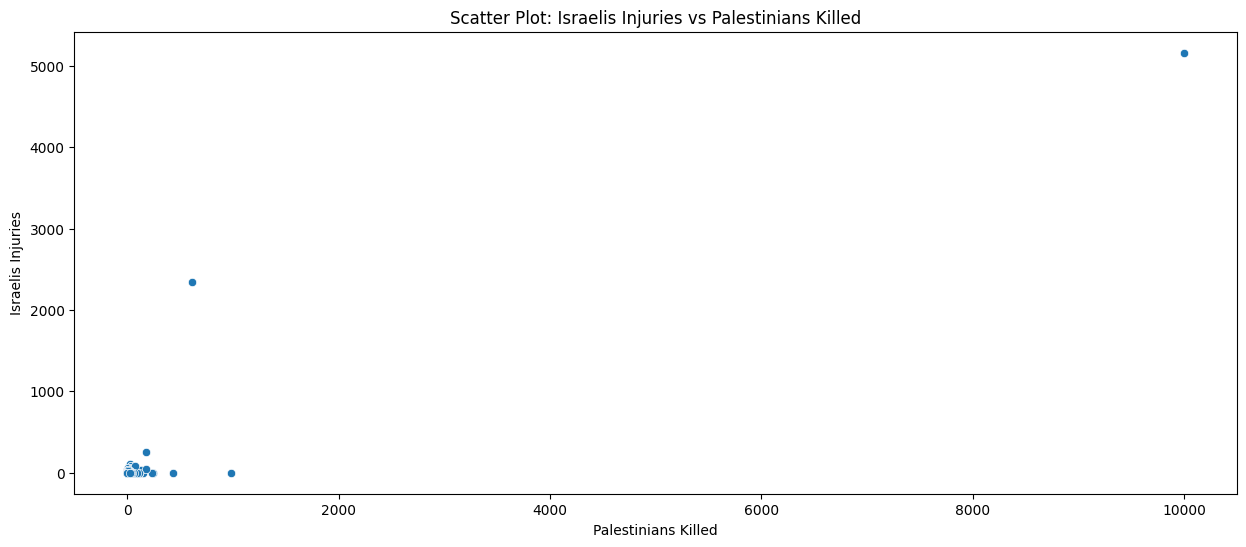

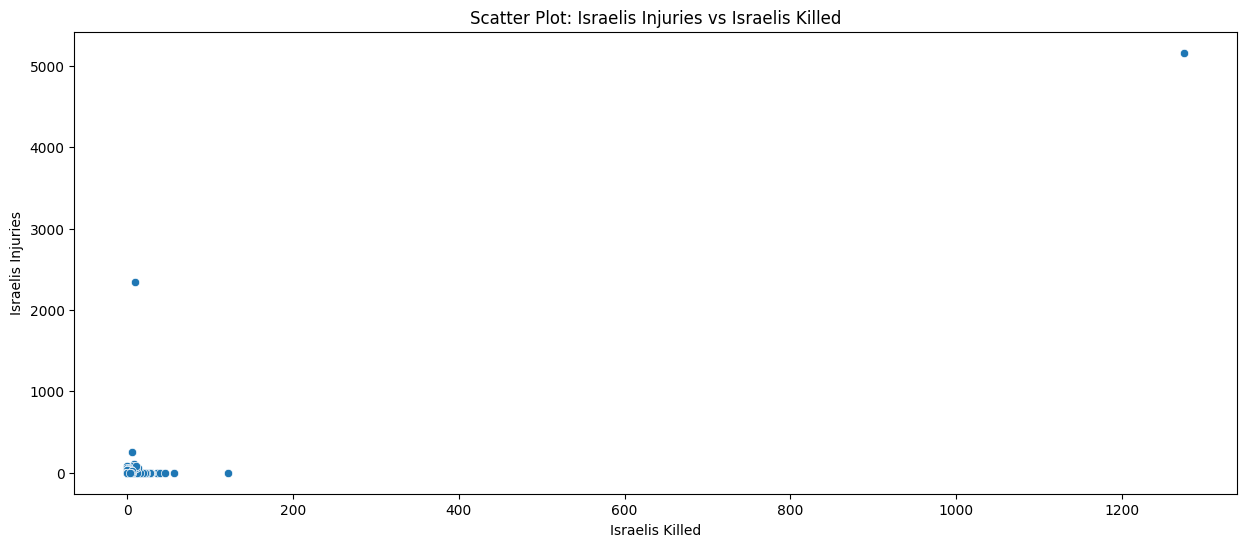

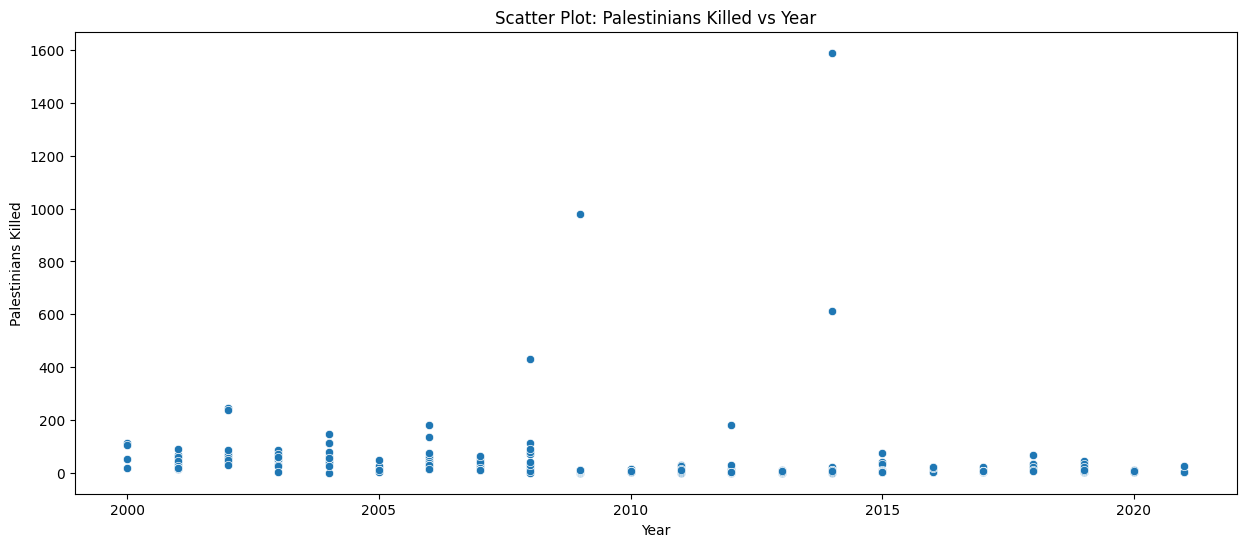

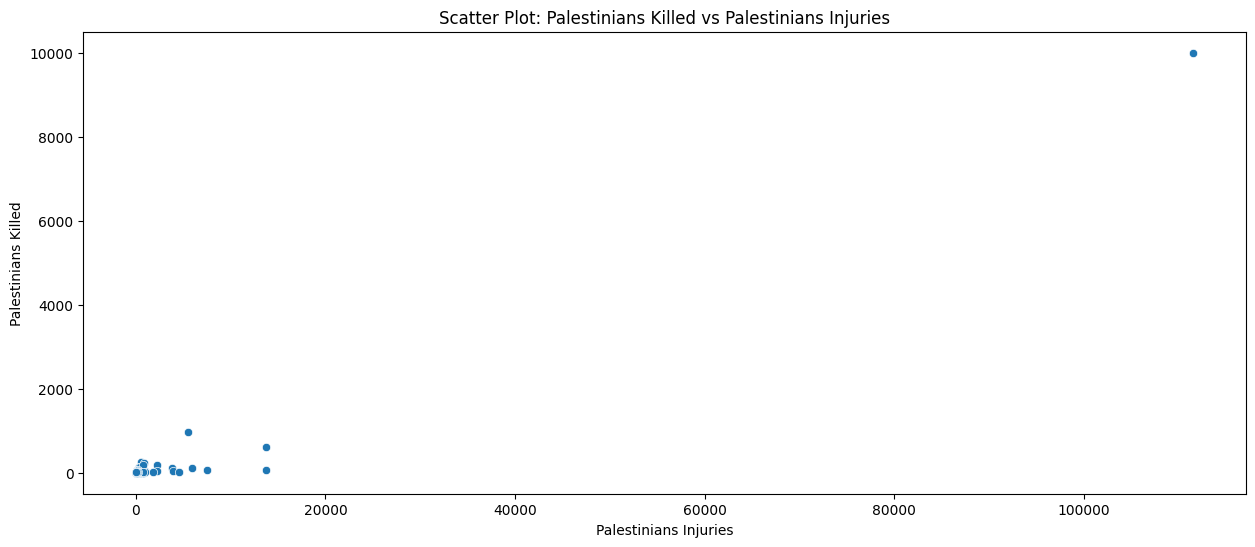

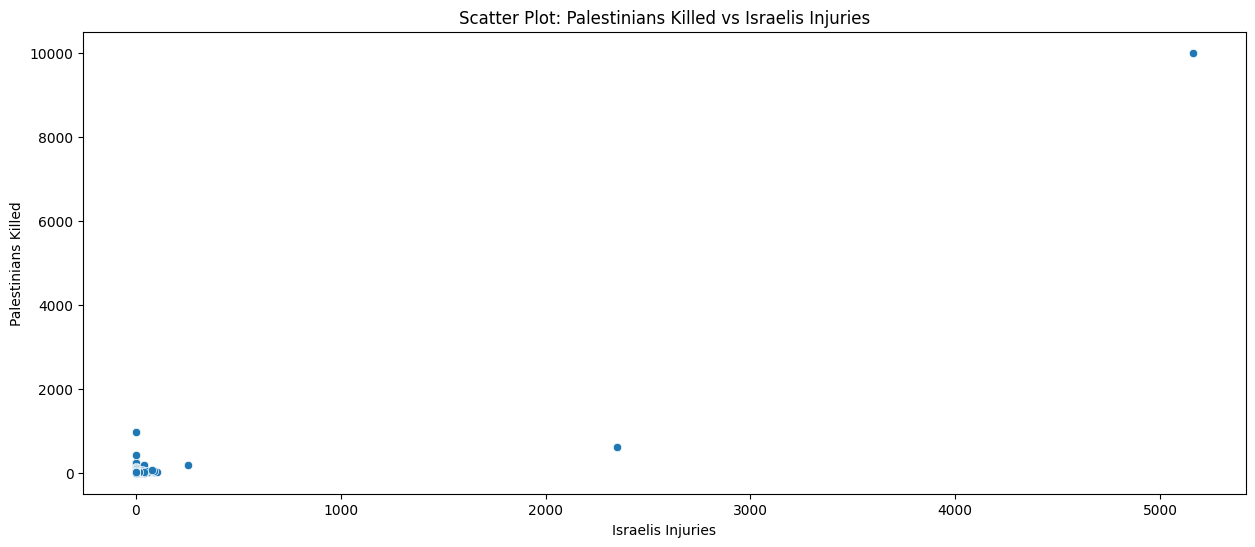

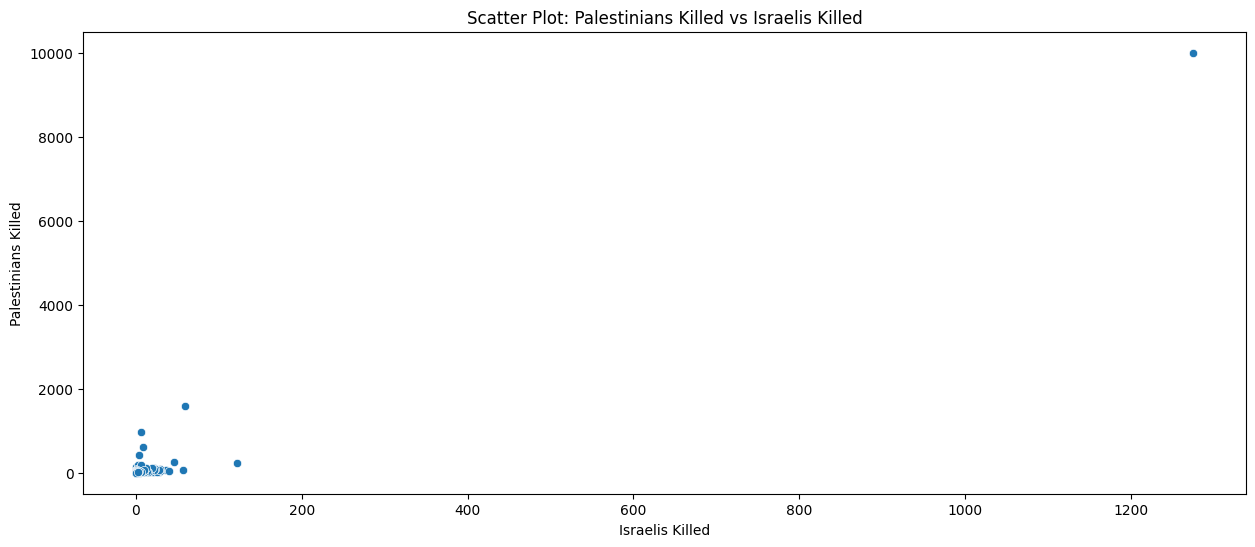

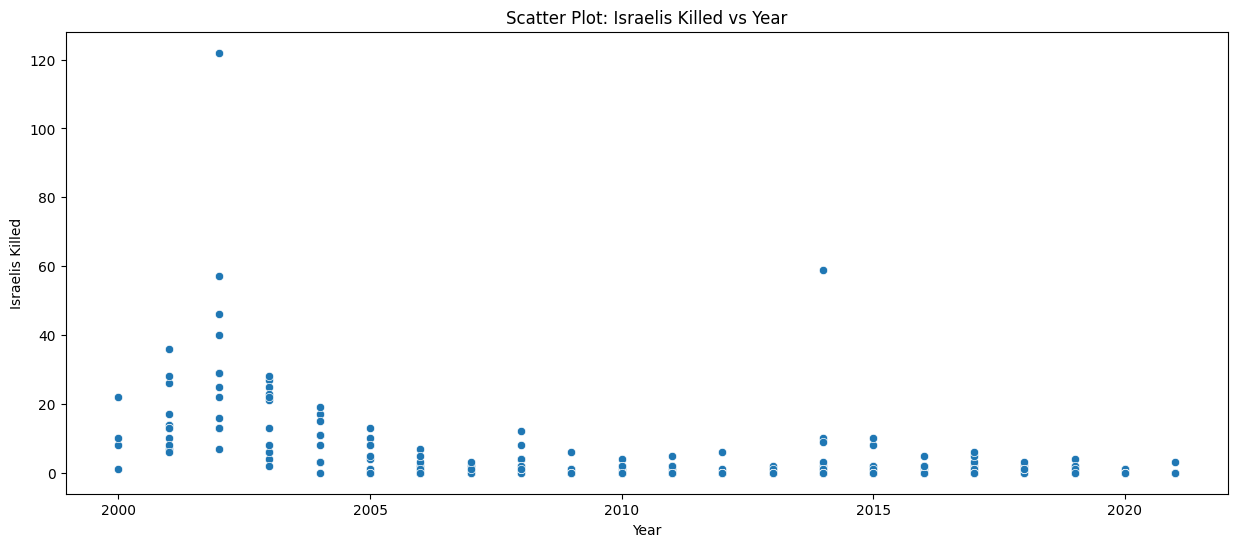

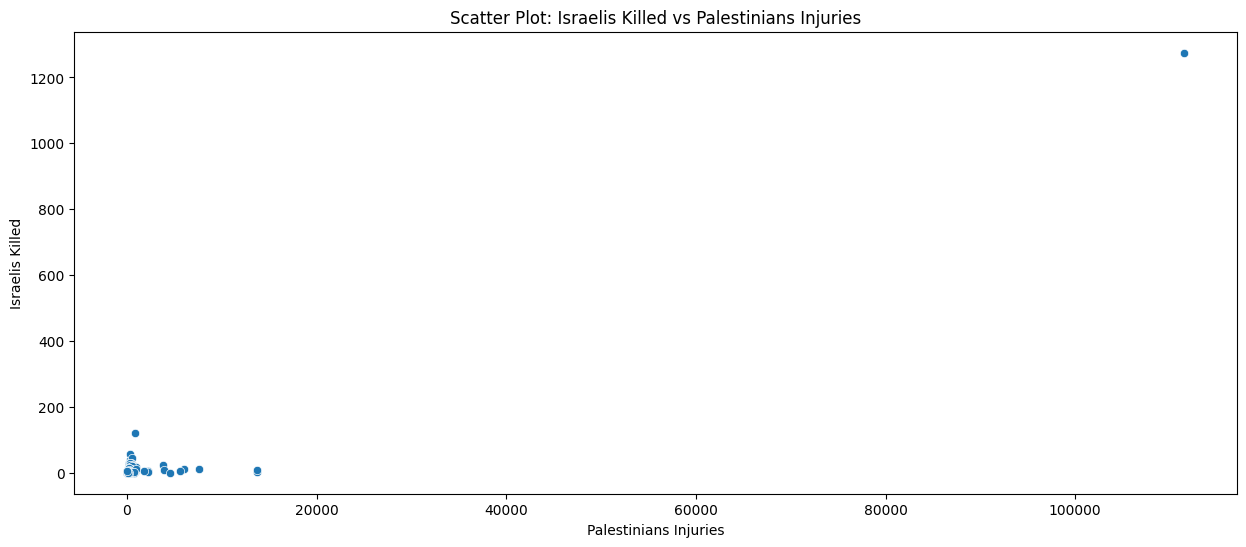

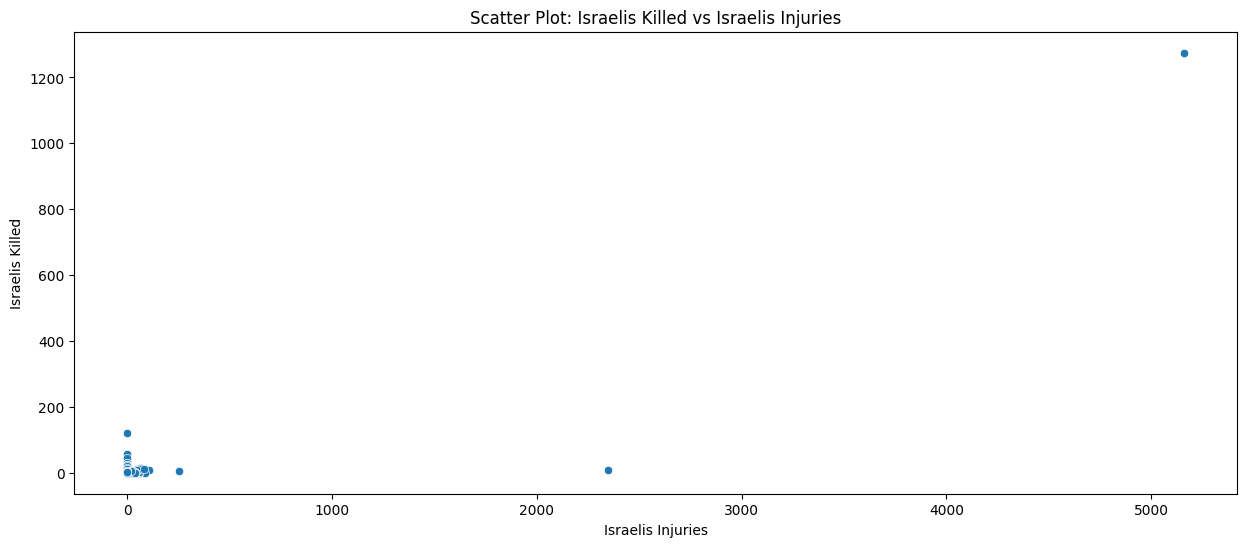

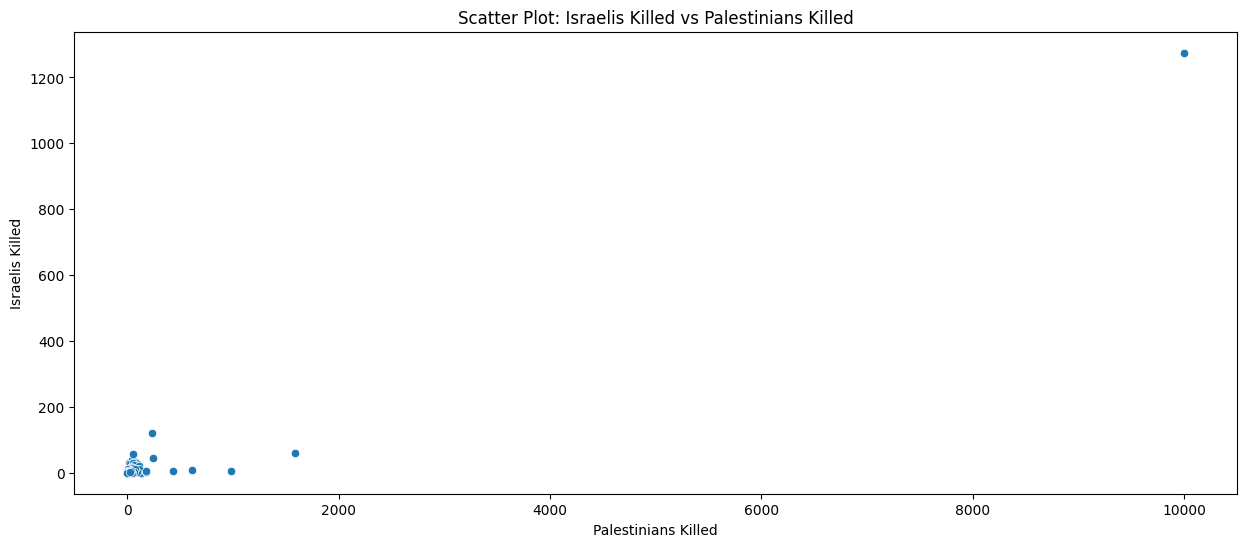

In [27]:
 for i in database1.columns:
        for j in database1.columns:
            if i != j:
                plt.figure(figsize=(15, 6))
                sns.scatterplot(x=database1[j], y=database1[i], data=database1, palette='hls')
                plt.title(f'Scatter Plot: {i} vs {j}')
                plt.show()

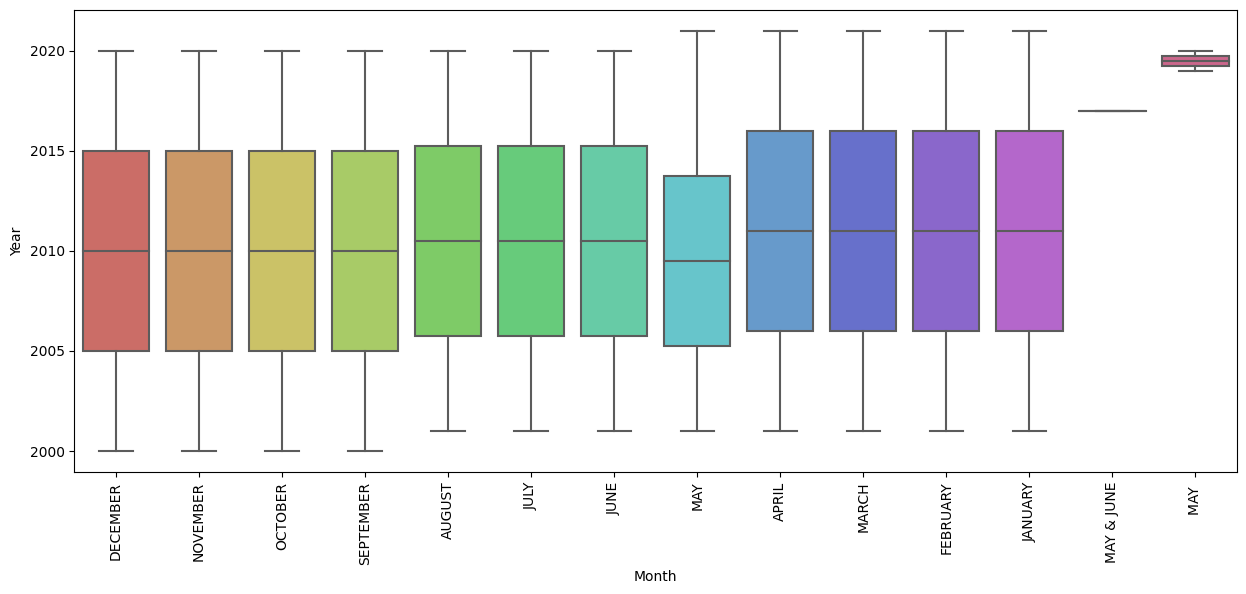

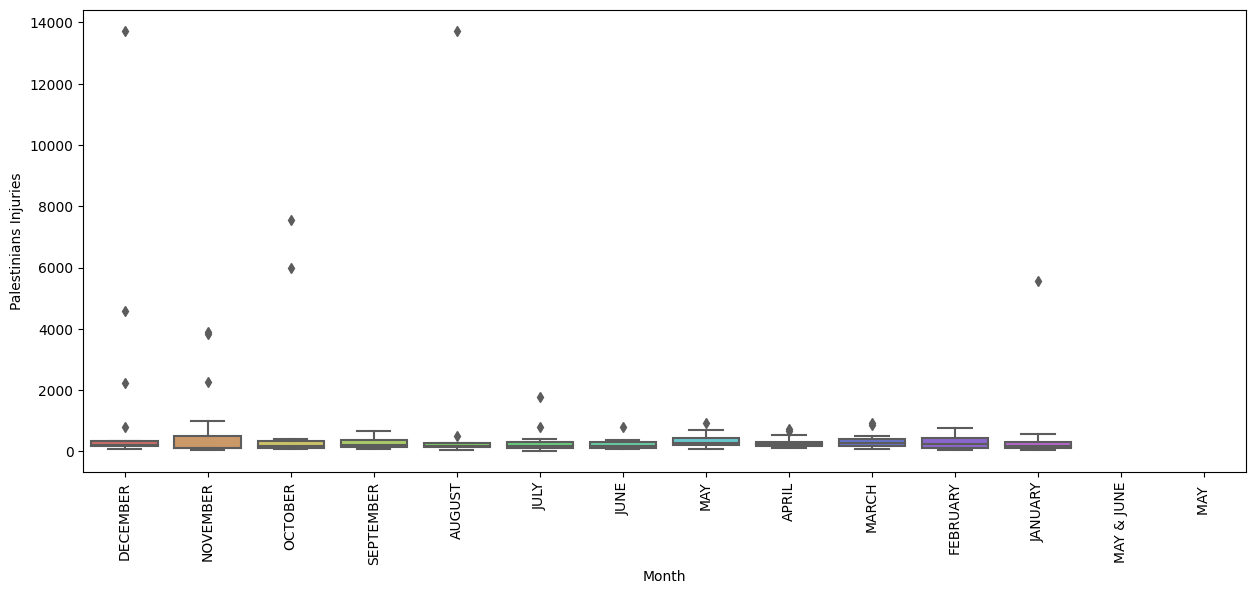

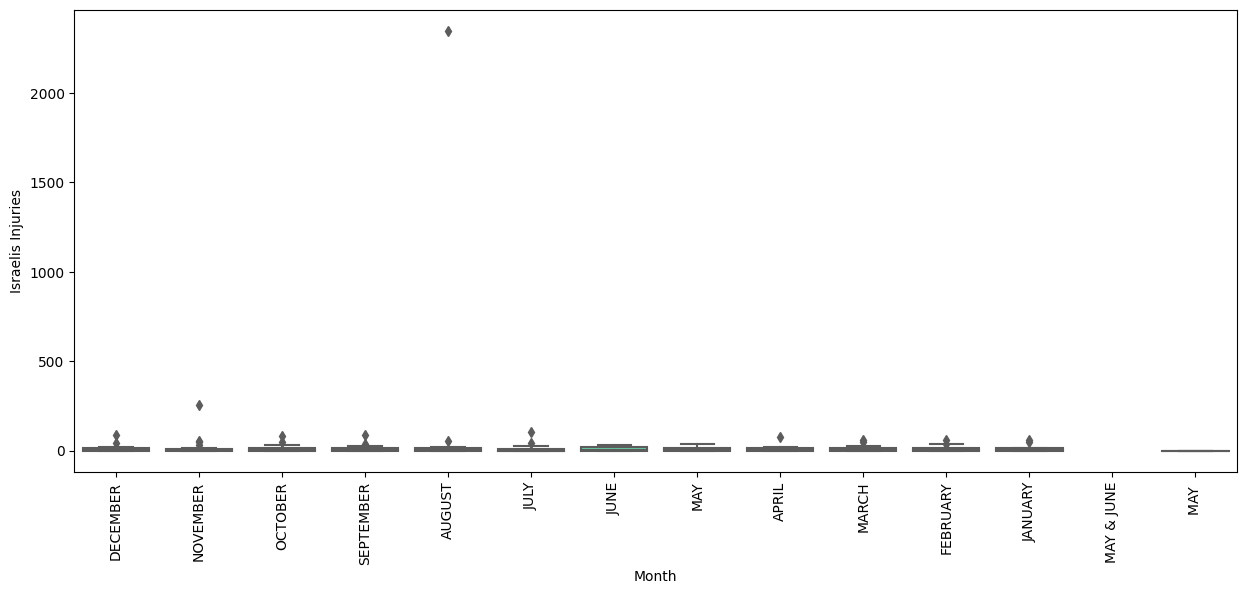

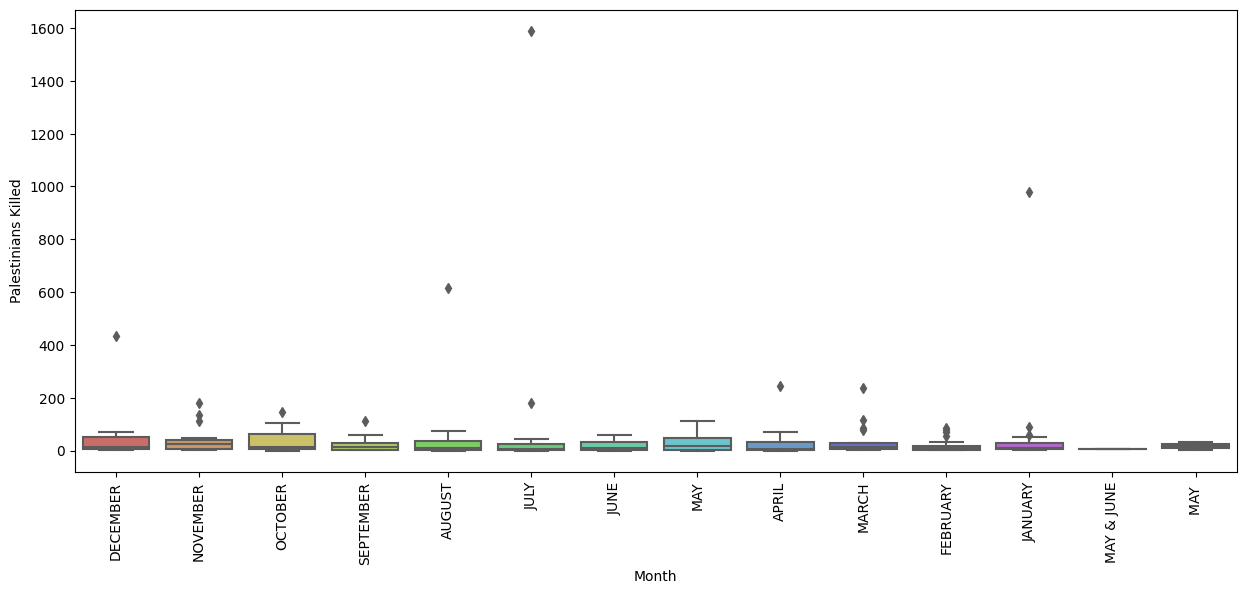

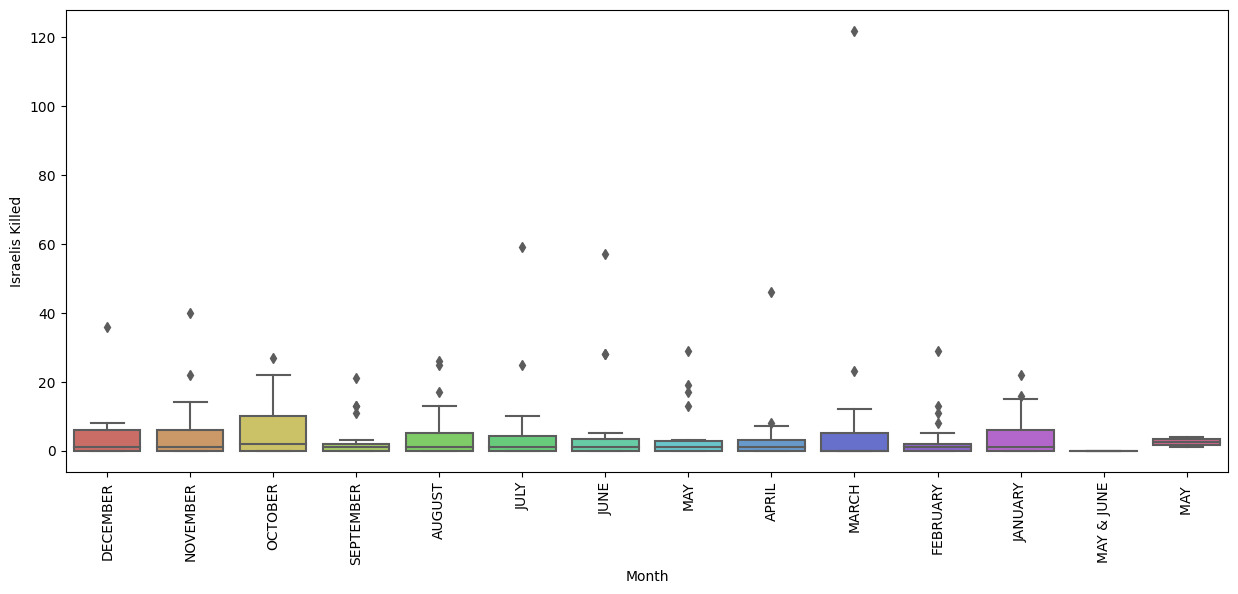

In [28]:
for i in database1.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x = database['Month'], y = database1[i], data=database, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

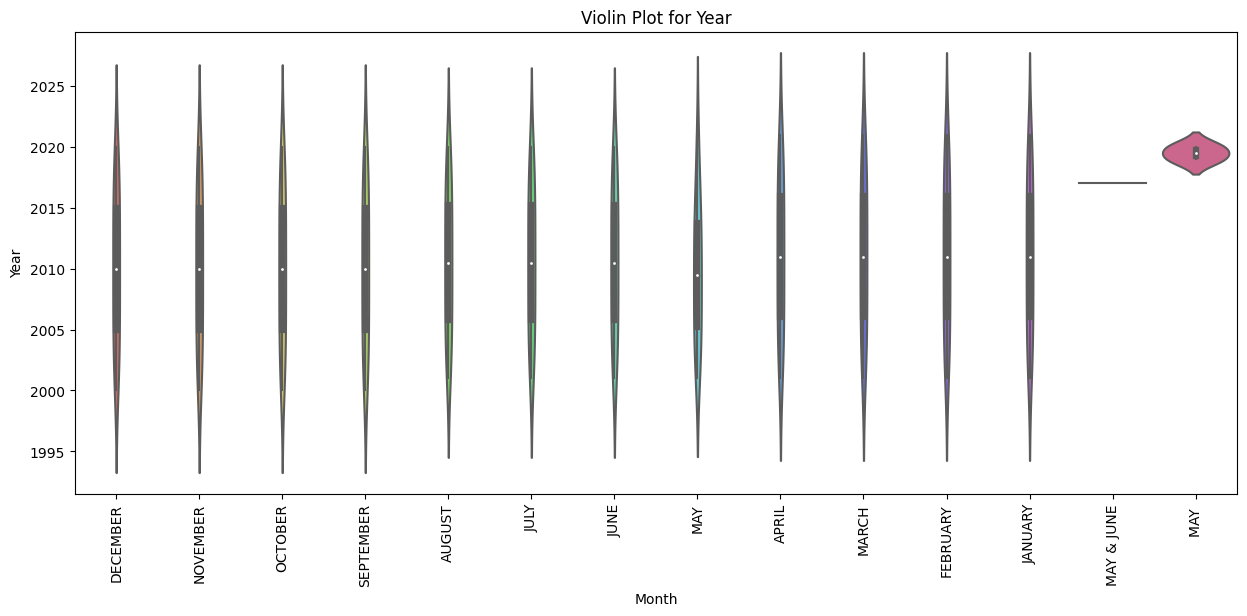

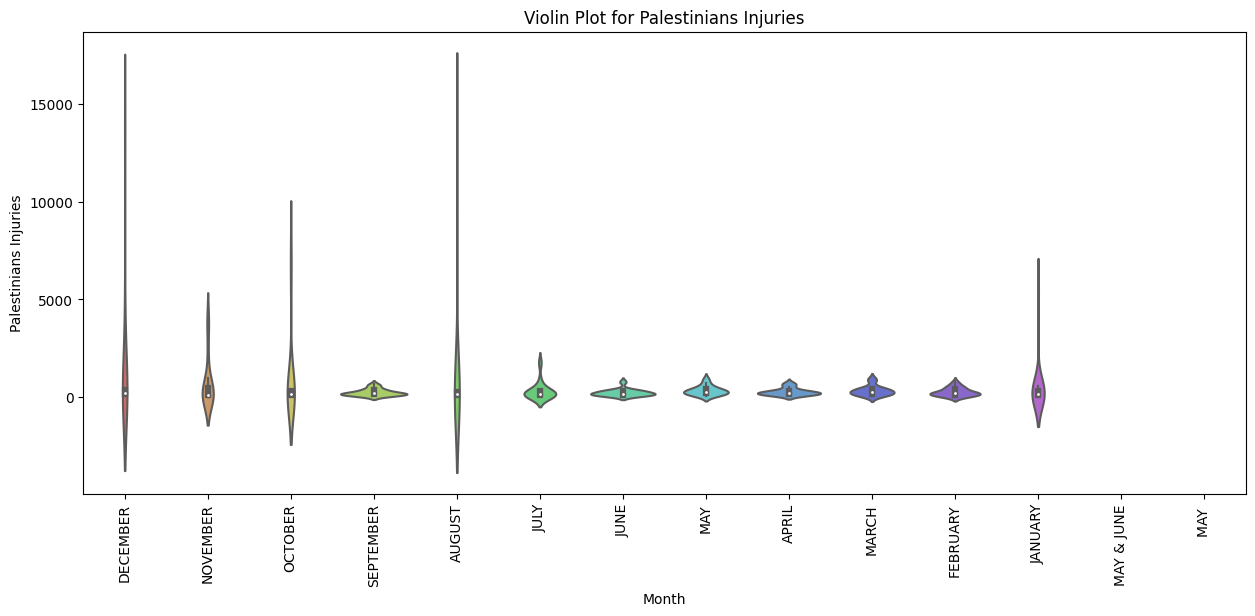

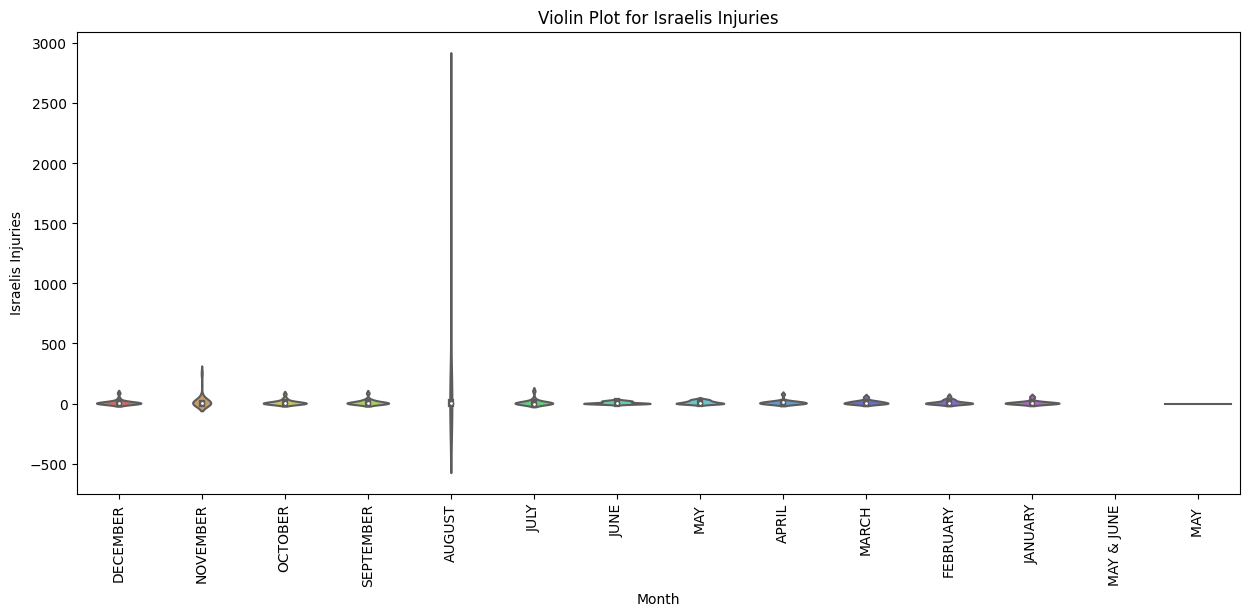

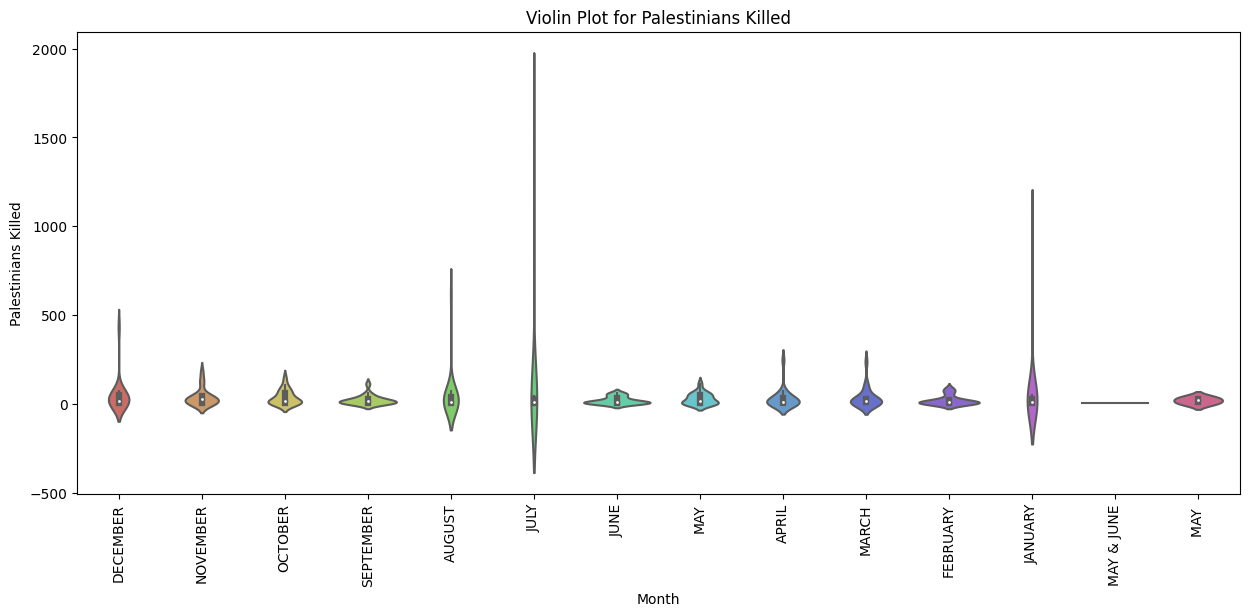

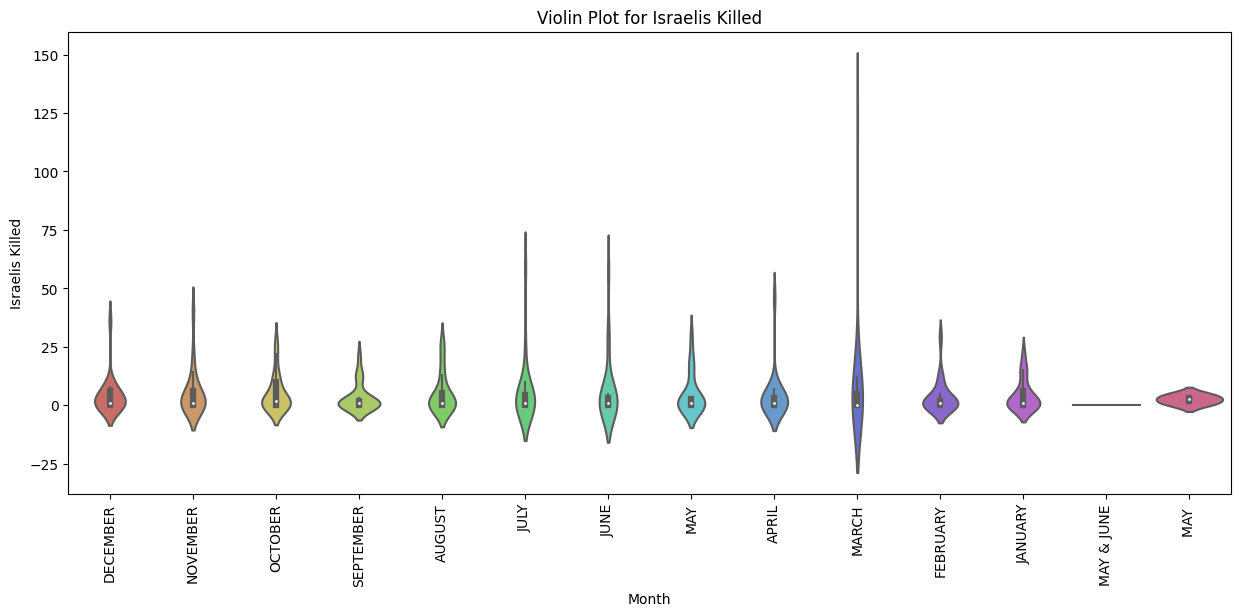

In [29]:
for i in database1.columns:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=database['Month'], y=database1[i], data=database1, palette='hls')
    plt.xticks(rotation = 90)
    plt.title(f'Violin Plot for {i}')
    plt.show()

In [30]:
import plotly.express as px

In [40]:
fig = px.line(database, x='Month', y=['Palastinians Injuries', 'Israelis Injuries', 'Palastin Killed', 'Israelis Killed'])
fig.show()


ValueError: All arguments should have the same length. The length of argument `y` is 4, whereas the length of  previously-processed arguments ['Month'] is 251

AttributeError: 'Series' object has no attribute 'set_title'

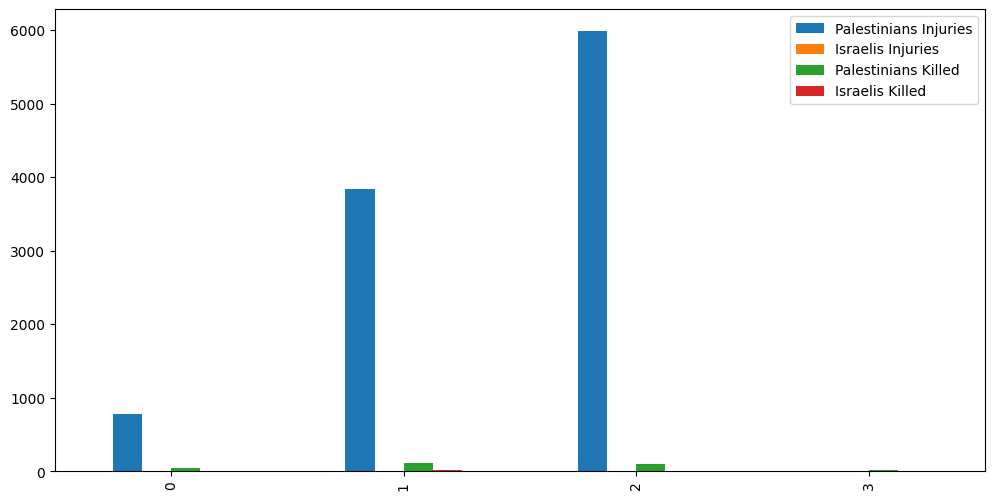

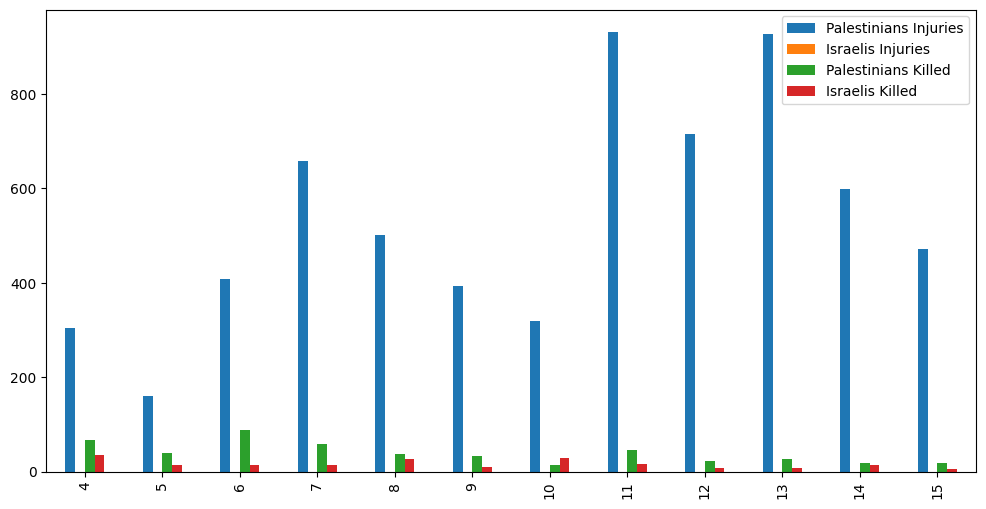

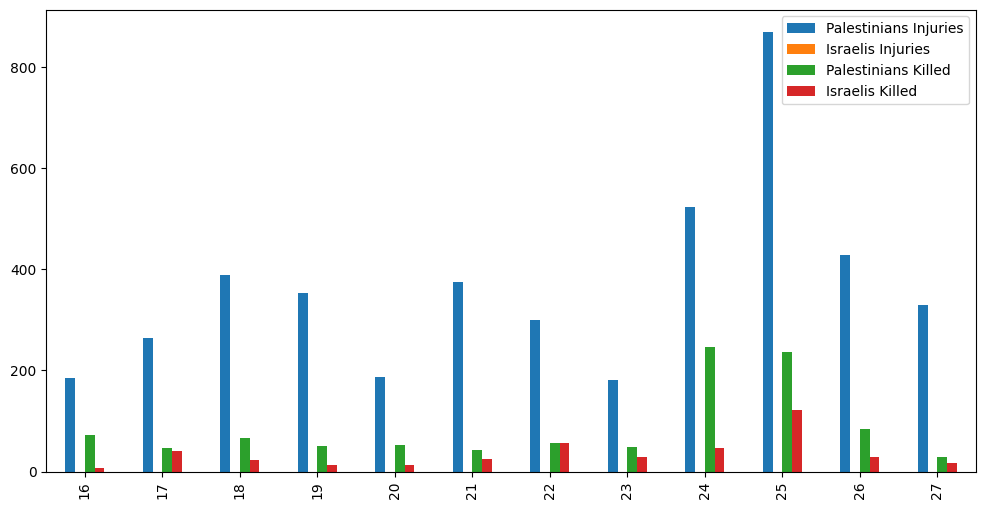

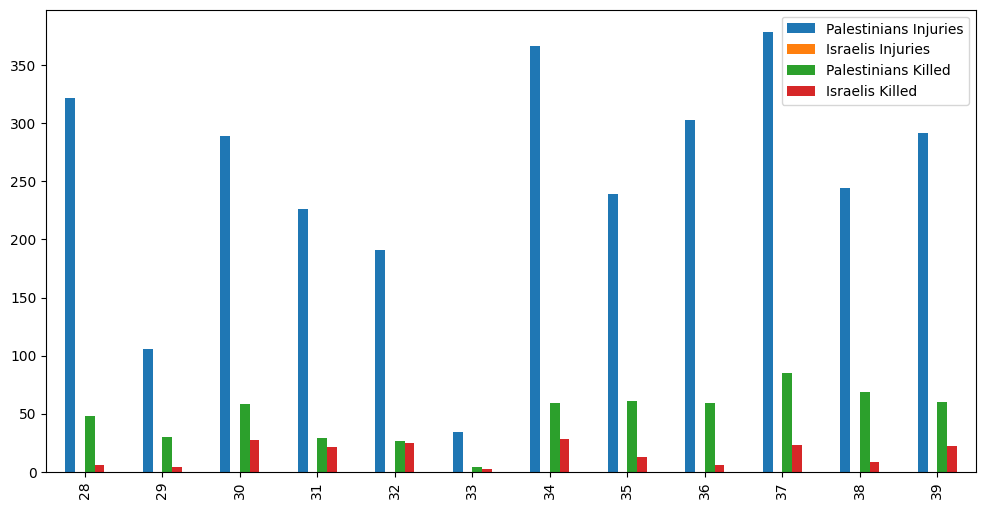

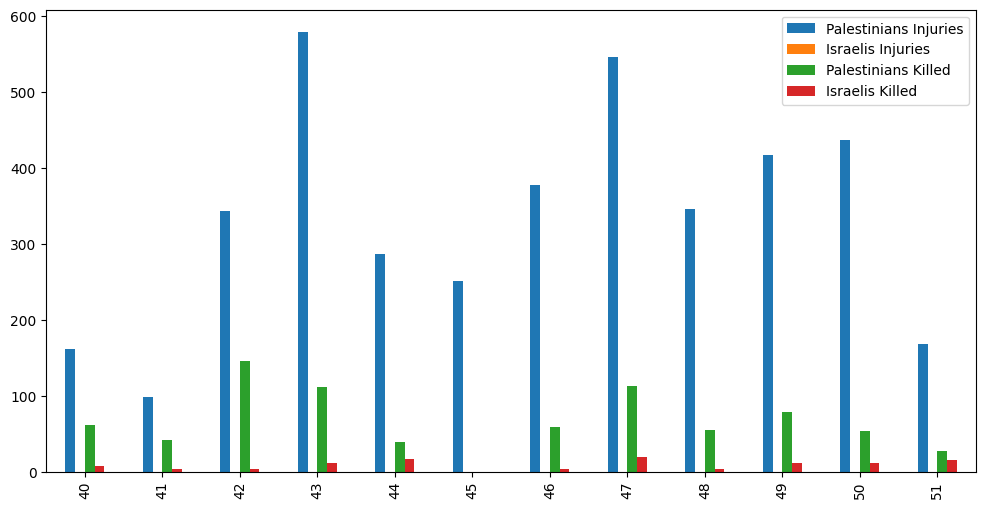

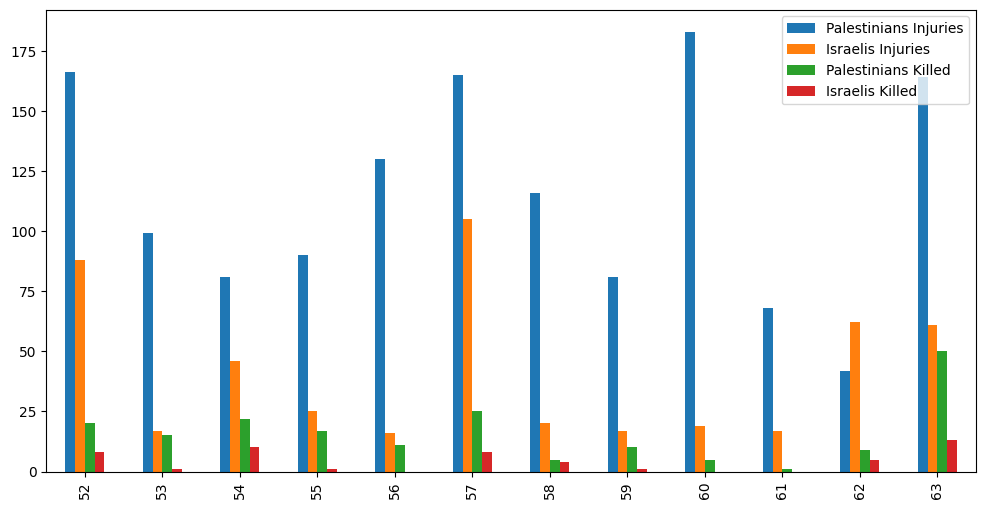

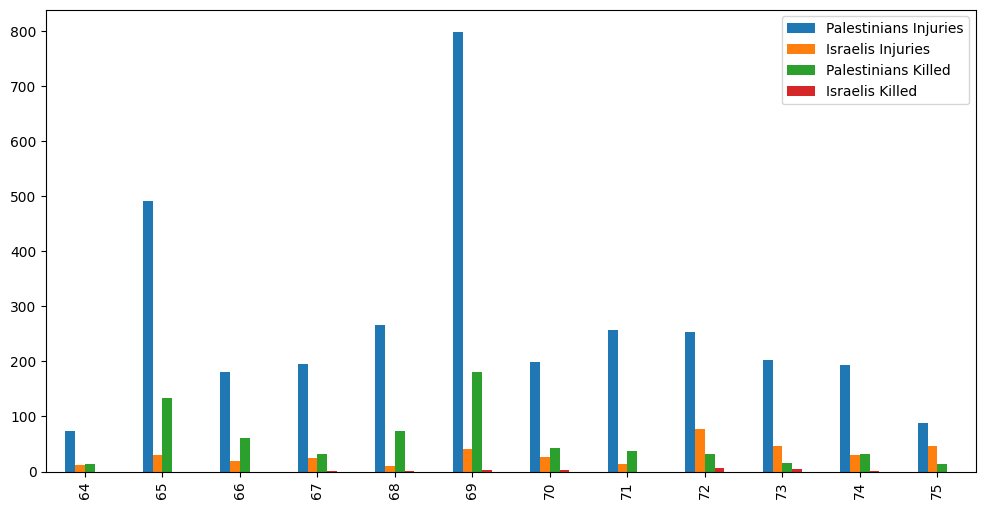

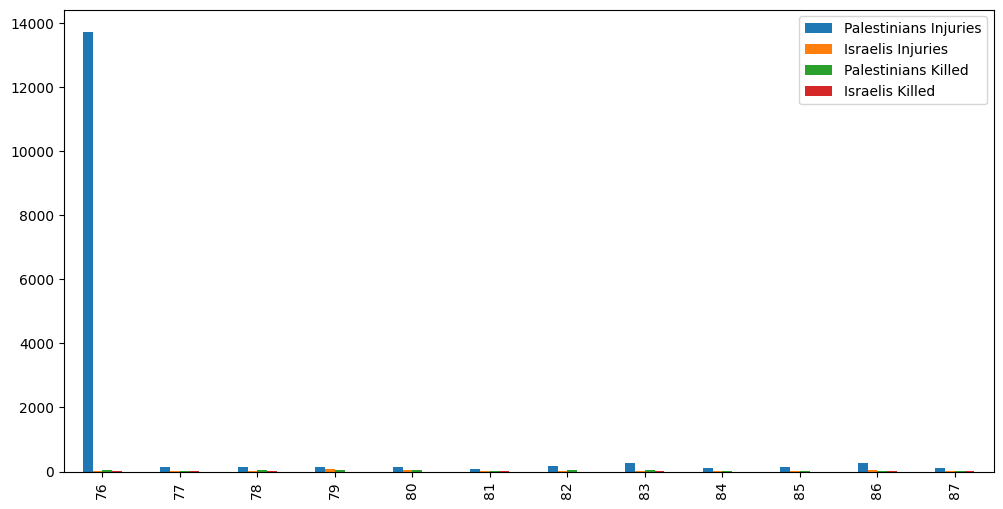

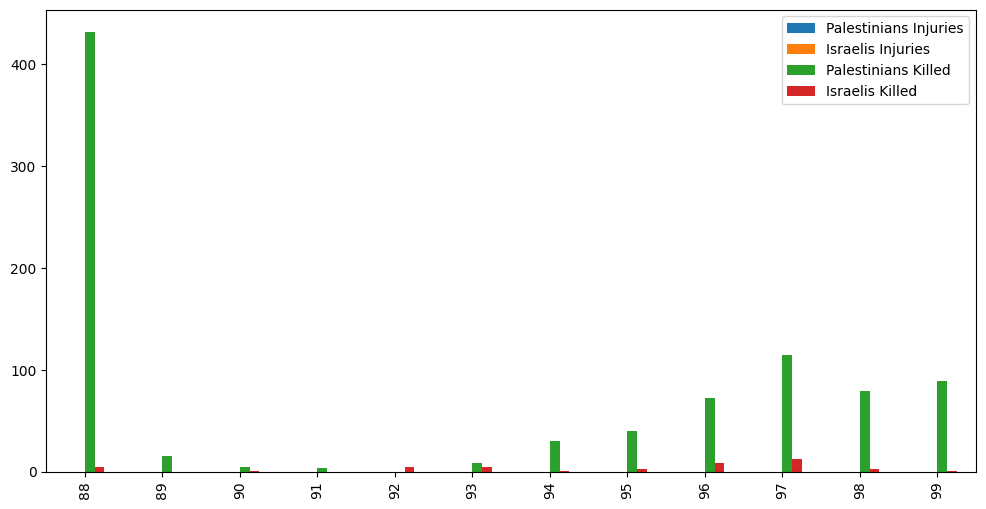

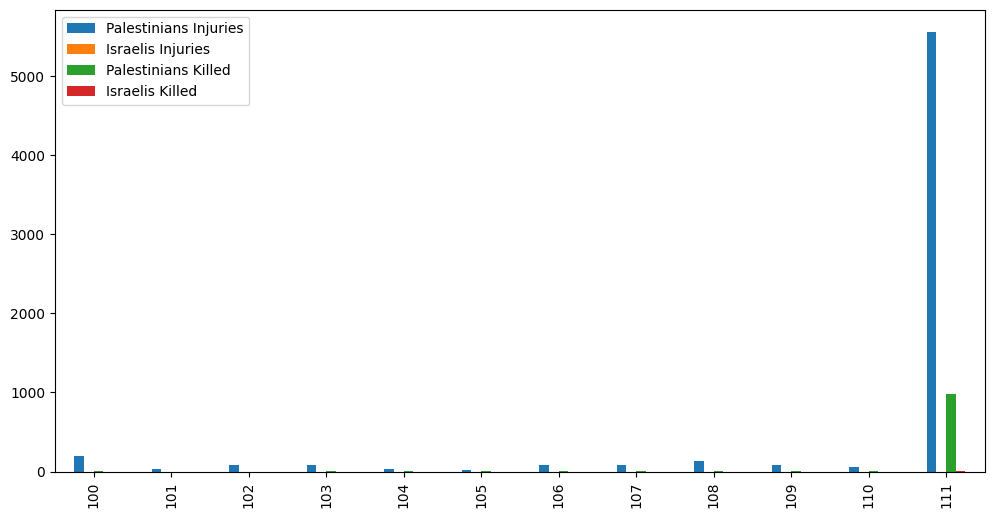

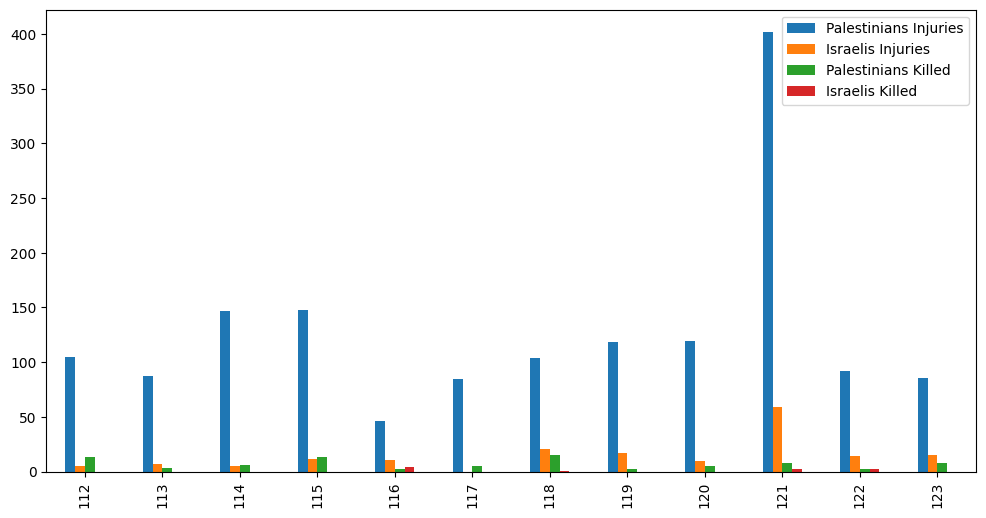

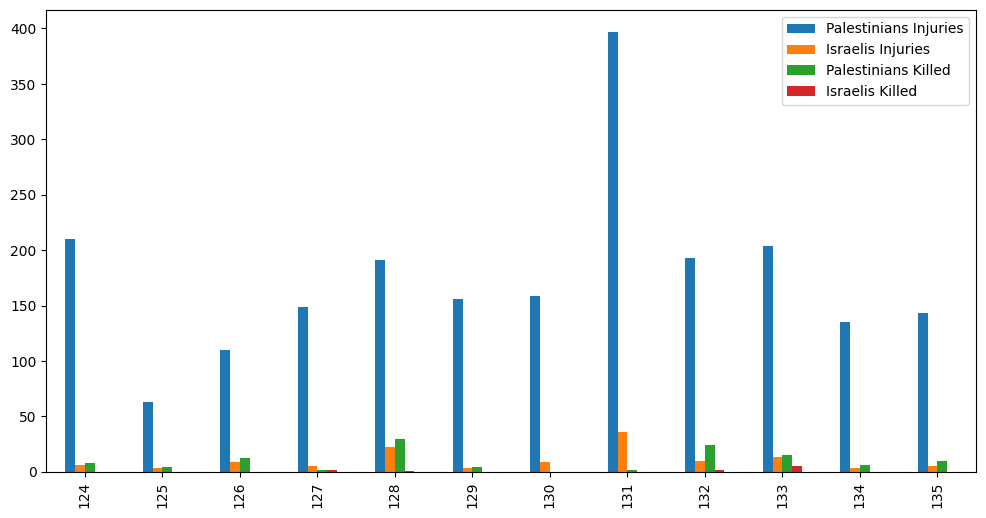

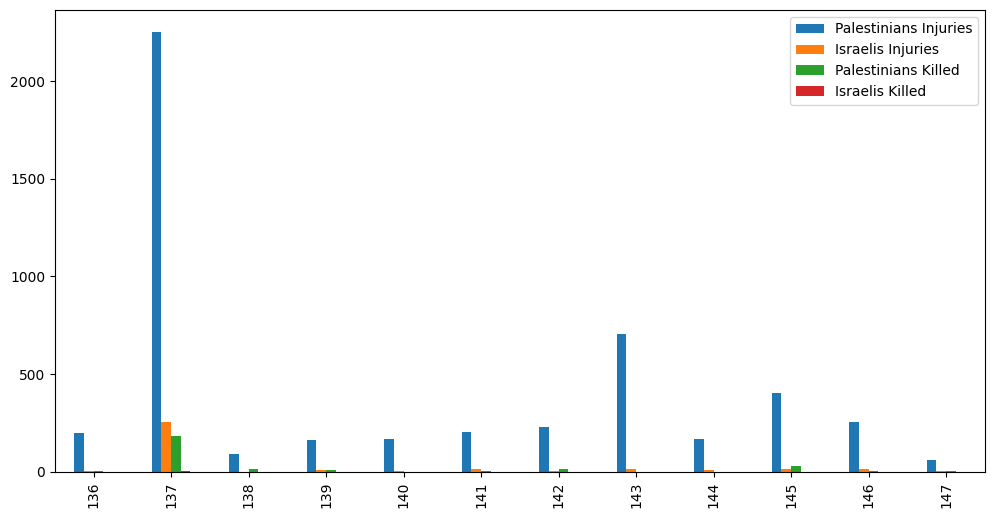

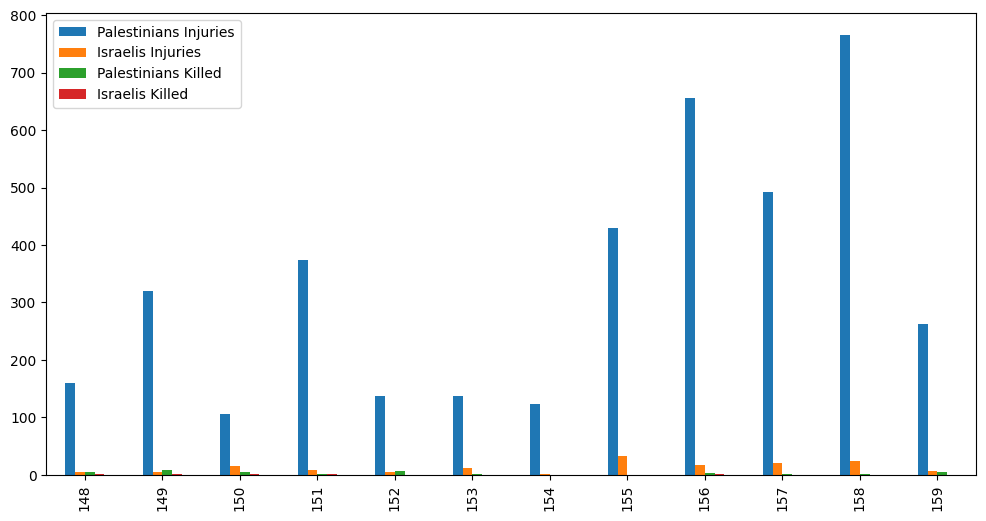

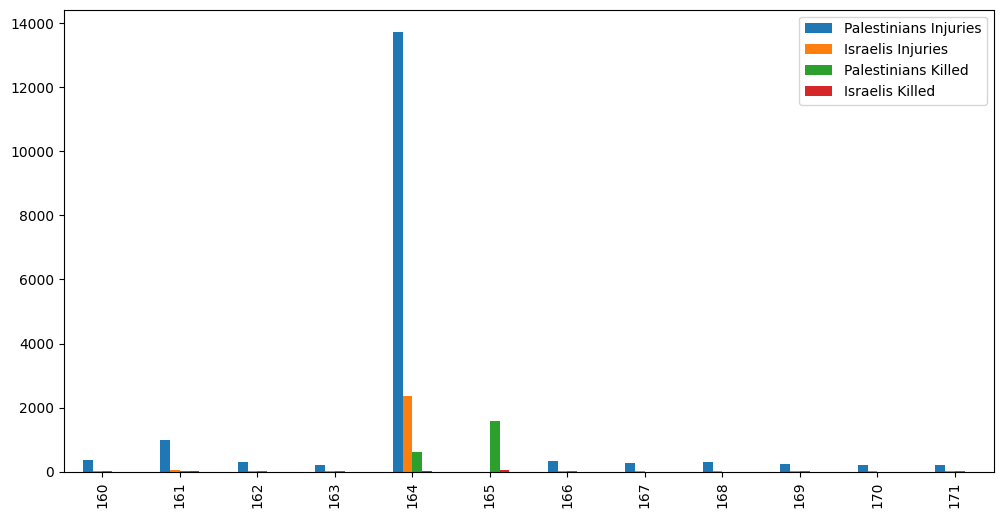

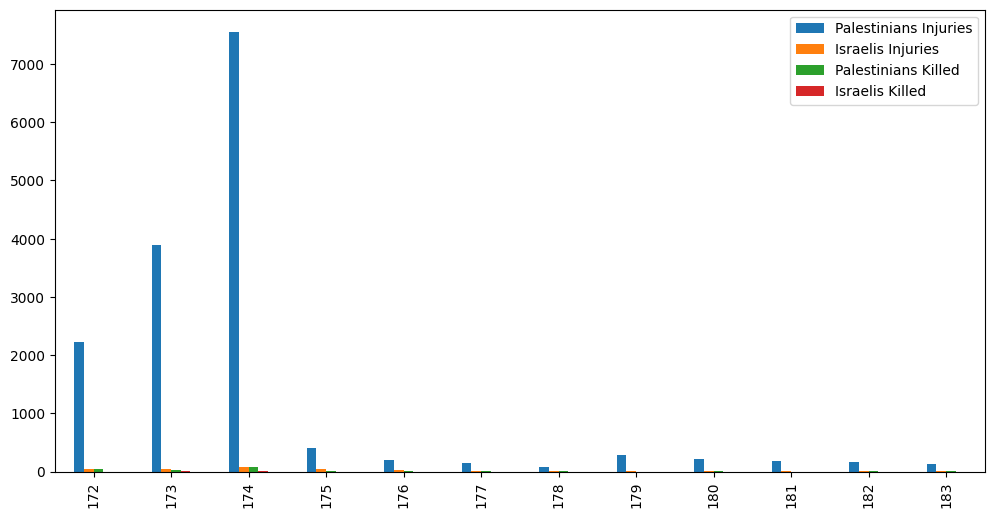

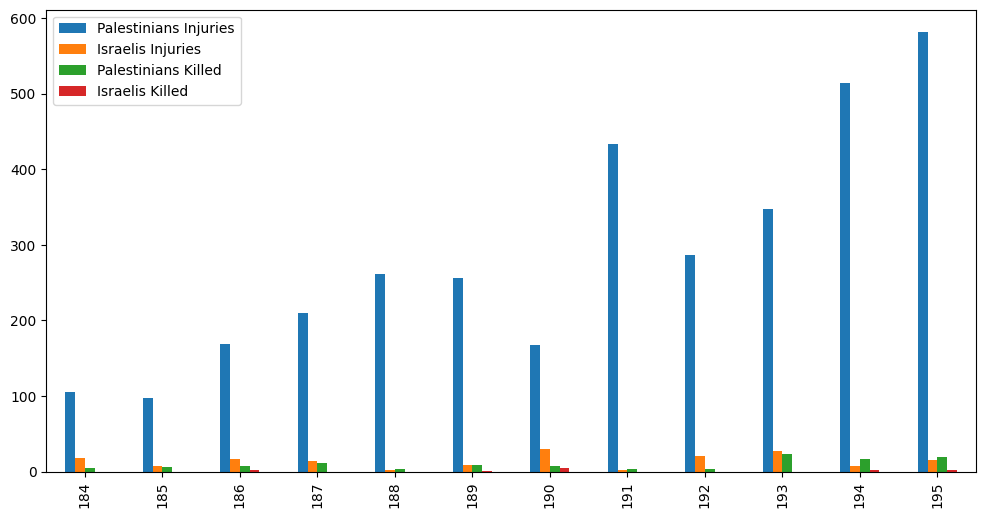

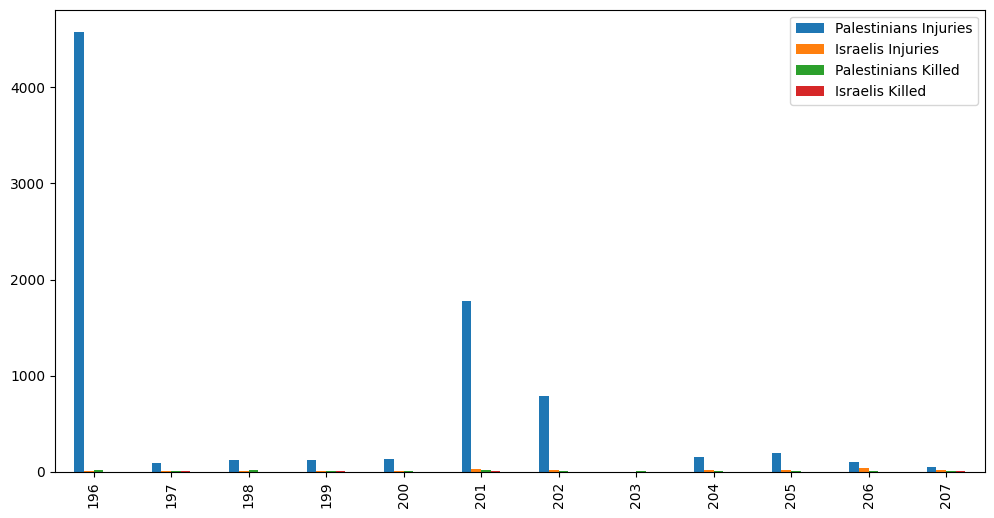

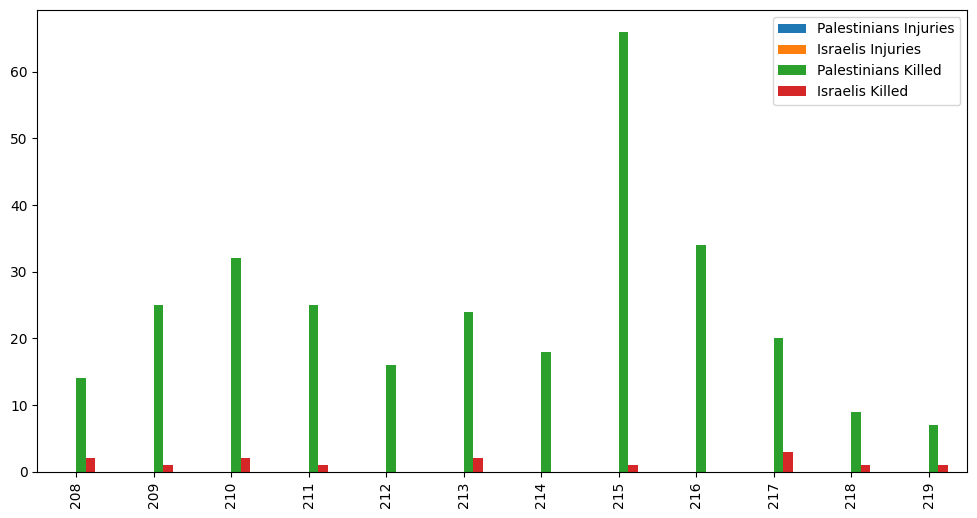

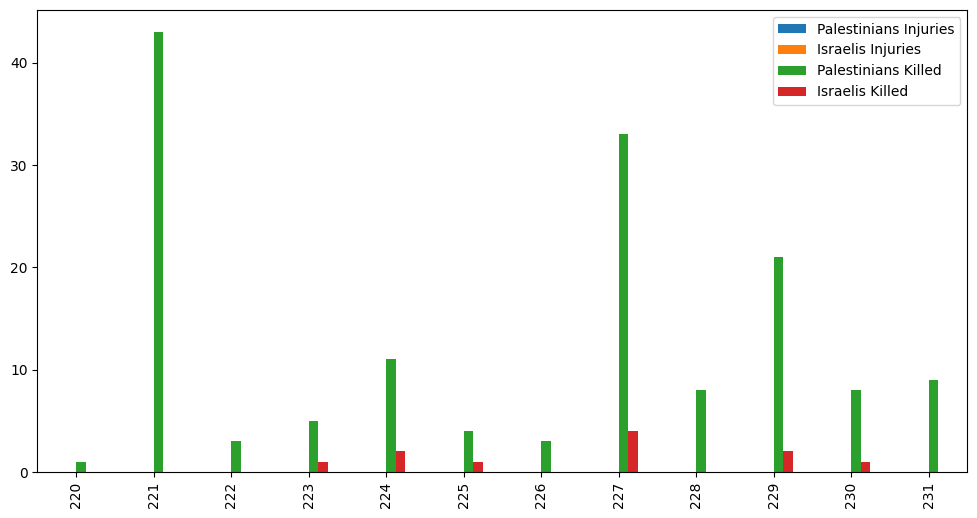

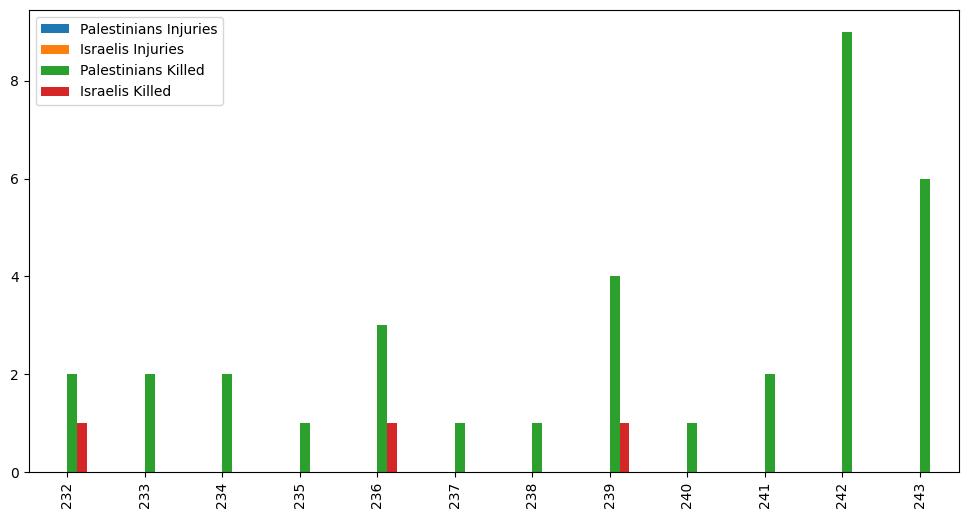

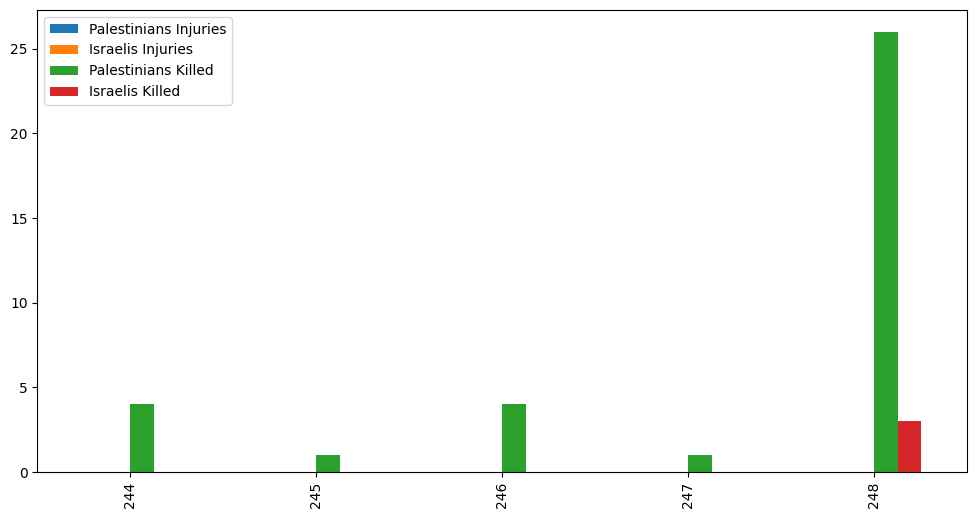

In [36]:
yearly_summary = database.groupby('Year')[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']]
ax = yearly_summary.plot(kind='bar', figsize=(12, 6))                                      
ax.set_title('Yearly Summary of Injuries and Deaths')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
plt.show()

In [41]:
fig = go.Figure()
for col in yearly_summary.columns:
    fig.add_trace(go.Bar(x=yearly_summary.index, y=yearly_summary[col], name=col))
    fig.update_layout(
        title='Yearly Summary of Injuries and Fatalities',
        xaxis=dict(title='Year'),
        yaxis=dict(title='Count'),
        barmode='stack')
fig.show()

AttributeError: 'DataFrameGroupBy' object has no attribute 'columns'

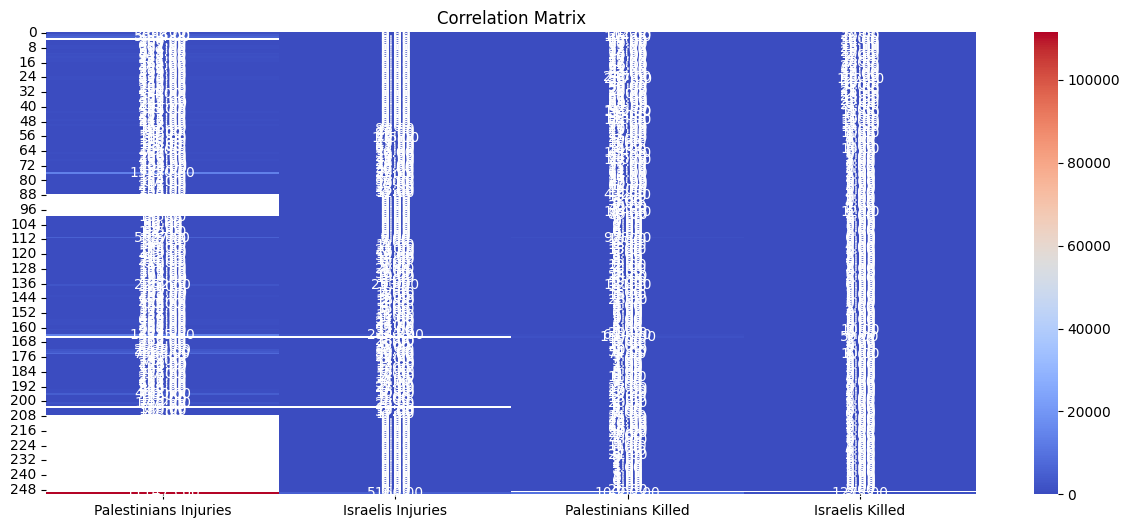

In [42]:
plt.figure(figsize=(15,6))
correlation_matrix = database[['Palestinians Injuries', 'Israelis Injuries', 'Palestinians Killed', 'Israelis Killed']]
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [43]:
database['Total Incidents'] = database['Palestinians Injuries'] + database['Israelis Injuries'] + database['Palestinians Killed'] + database['Israelis Killed']
database['Palestinian Fatality Rate'] = database['Palestinians Killed'] / database['Total Incidents']
database['Israeli Fatality Rate'] = database['Israelis Killed'] / database['Total Incidents']

In [44]:
database

Year      Month  Palestinians Injuries  Israelis Injuries   
0    2000.0   DECEMBER                  781.0                0.0  \
1    2000.0   NOVEMBER                 3838.0                0.0   
2    2000.0    OCTOBER                 5984.0                0.0   
3    2000.0  SEPTEMBER                    NaN                0.0   
4    2001.0   DECEMBER                  304.0                0.0   
..      ...        ...                    ...                ...   
246  2021.0      MARCH                    NaN                0.0   
247  2021.0      APRIL                    NaN                0.0   
248  2021.0        MAY                    NaN                0.0   
249     NaN        NaN                    NaN                0.0   
250     NaN        NaN               111475.0             5160.0   

     Palestinians Killed  Israelis Killed  Total Incidents   
0                   51.0              8.0            840.0  \
1                  112.0             22.0           3972.0   
2                  104.0             10.0           6098.0   
3                   16.0              1.0              NaN   
4                   67.0             36.0            407.0   
..                   ...              ...              ...   
246                  4.0              0.0              NaN   
247                  1.0              0.0              NaN   
248                 26.0              3.0              NaN   
249                  NaN              NaN              NaN   
250              10000.0           1275.0         127910.0   

     Palestinian Fatality Rate  Israeli Fatality Rate  
0                     0.060714               0.009524  
1                     0.028197               0.005539  
2                     0.017055               0.001640  
3                          NaN                    NaN  
4                     0.164619               0.088452  
..                         ...                    ...  
246                        NaN                    NaN  
247                        NaN                    NaN  
248                        NaN                    NaN  
249                        NaN                    NaN  
250                   0.078180               0.009968  

[251 rows x 9 columns]

In [45]:
database.columns

Index(['Year', 'Month', 'Palestinians Injuries', 'Israelis Injuries',
       'Palestinians Killed', 'Israelis Killed', 'Total Incidents',
       'Palestinian Fatality Rate', 'Israeli Fatality Rate'],
      dtype='object')

In [46]:
import plotly.graph_objs as go

In [55]:
database['Group'] = database.apply(lambda row: 'Palestinians' if row['Palestinians Killed'] > row['Israelis Killed'] else 'Israeli')
total_incidents_by_group = database.groupby('Group')[['Total Incidents', 'Palestinians Killed', 'Israelis Killed']].sum()
fatality_rate_by_group = database.groupby('Group')[['Palestinian Fatality Rate', 'Israeli Fatality Rate']].mean()
print("Total Incidents, Palestinians Killed, Israelis Killed by Group:\n", total_incidents_by_group)
print("\nFatality Rates by Group:\n", fatality_rate_by_group)

KeyError: 'Palestinians Killed'

In [53]:
total_incidents_by_group

NameError: name 'total_incidents_by_group' is not defined

In [56]:
fatality_rate_by_group

NameError: name 'fatality_rate_by_group' is not defined

In [58]:
import pandas as pd
yearly_trends = database.groupby('Year') [['Total Incidents', 'Palestinians Killed', 'Israelis Killed']]

In [59]:
yearly_trends

In [60]:
print("Total Incidents, Palestinians Killed, Israelis Killed by Group:\n", total_incidents_by_group.sum())
print("\nFatality Rates by Group:\n", fatality_rate_by_group.mean())

NameError: name 'total_incidents_by_group' is not defined

In [61]:
print('Total Incidents:', total_incidents)
print('Total Palestinian Incidents:', total_palestinian_incidents)
print('Total Israeli Incidents:', total_israeli_incidents)
print('Proportion of Palestinian Incidents:', palestinian_proportion)
print('Proportion of Israeli Incidents:', israeli_proportion)

NameError: name 'total_incidents' is not defined

In [63]:
import plotly.graph_objs as go
# Assuming df is your DataFrame
fig = go.Figure()
# Add a scatter trace for Palestinian Fatality Rate
fig.add_trace(go.Scatter(x=database['Year'], y=database['Palestinian Fatality Rate'], mode='lines', name='Palestinian Fatality Rate'
# Add another scatter trace for Israeli Fatality Rate
fig.add_trace(go.Scatter(x=database['Year'], y=database['Israeli Fatality Rate'], mode='lines', name='Israeli Fatality Rate'))
fig.update_layout(
 title='Fatality Rates Over Time',
 xaxis_title='Year',
 yaxis_title='Fatality Rate'
)
fig.show()

SyntaxError: '(' was never closed (1752627462.py, line 5)